# **Discourse & Sentiment Mapping: Deep Insights from Social Media Analytics**

<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 30px; border-radius: 15px; color: white; margin: 20px 0;">
  <h2 style="margin:0; color:white;"> Executive Summary</h2>
  <p style="font-size:16px; margin-top:15px;">
  This notebook presents a <b>comprehensive social media discourse analysis</b> of 10,000 Twitter posts spanning January–April 2023. Using advanced NLP techniques including sentiment analysis (VADER & TextBlob), topic modeling (LDA & BERTopic), and network analysis (NetworkX), we uncover:<br><br>

  <b>Dominant emotional tones</b> and their evolution over time<br>
  <b>Latent thematic structures</b> driving online conversations<br>
  <b>Knowledge maps</b> revealing discourse relationships and influence patterns<br>
  <b>Polarization zones</b> and consensus areas within the discourse
  </p>
</div>

---



**EDAB 6808** | Business & Financial Analytics (Honours)  
**University of the Free State** | Assignment 4  
**Date**: November 2025

---


##  **Ethics and Privacy Statement**

<div style="background-color: #fff3cd; padding: 20px; border-left: 5px solid #ffc107; border-radius: 5px;">
 <b>Data Handling Protocol</b><br><br>
All analysis adheres to strict ethical guidelines:<br>
• Usernames are <b>anonymized pseudonyms</b><br>
• Analysis conducted at <b>aggregate level only</b><br>
• Subject to <b>Non-Disclosure Agreement (NDA)</b><br>
• No attempt to identify individuals<br>
• Data to be deleted post-submission
</div>

---

# **1. ENVIRONMENT SETUP**

<div style="background-color: #e3f2fd; padding: 15px; border-radius: 8px; border-left: 4px solid #2196f3;">
Installing required packages and configuring the analysis environment. This ensures reproducibility and consistent results across runs.
</div>

## **1.1** **Package Installation**

In [1]:
# Install all required packages
!pip install -q pandas numpy matplotlib seaborn plotly textblob vaderSentiment nltk gensim bertopic pyLDAvis wordcloud networkx scikit-learn scipy

# Verify installation
import sys
print(f"✅ Python {sys.version}")
print("✅ All packages installed successfully!")
print("\n📦 Ready for analysis")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 71.3 MB/s eta 0:00:00
✅ Python 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
✅ All packages installed successfully!

📦 Ready for analysis


## 1.2 Library Imports & Configuration

Organized imports grouped by functionality for clarity.

In [2]:
# ═══════════════════════════════════════════════════════════════
# CORE LIBRARIES
# ═══════════════════════════════════════════════════════════════
import warnings
import pandas as pd
import numpy as np
import re
from datetime import datetime
from collections import Counter, defaultdict
from itertools import combinations

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 150)
np.random.seed(42)  # Reproducibility

# ═══════════════════════════════════════════════════════════════
# VISUALIZATION
# ═══════════════════════════════════════════════════════════════
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud

# Visual styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
sns.set_context("notebook", font_scale=1.1)

# Custom color schemes
SENTIMENT_COLORS = {
    'Positive': '#2ecc71',
    'Negative': '#e74c3c',
    'Neutral': '#95a5a6'
}

PLOTLY_TEMPLATE = 'plotly_white'

# ═══════════════════════════════════════════════════════════════
# NLP & TEXT PROCESSING
# ═══════════════════════════════════════════════════════════════
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Download NLTK resources
for resource in ['stopwords', 'punkt', 'wordnet', 'omw-1.4', 'averaged_perceptron_tagger', 'punkt_tab']:
    nltk.download(resource, quiet=True)

# Initialize sentiment analyzers
vader = SentimentIntensityAnalyzer()

# ═══════════════════════════════════════════════════════════════
# TOPIC MODELING
# ═════════════════════════════════════════════════════════════
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel, Phrases
from gensim.models.phrases import Phraser
from bertopic import BERTopic
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# ═══════════════════════════════════════════════════════════════
# MACHINE LEARNING & STATISTICS
# ═══════════════════════════════════════════════════════════════
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from scipy import stats
from scipy.stats import chi2_contingency

# ═══════════════════════════════════════════════════════════════
# NETWORK ANALYSIS
# ═══════════════════════════════════════════════════════════════
import networkx as nx
from networkx.algorithms import community

print("✅ All libraries imported successfully!")
print(f"📌 Random seed: 42 (for reproducibility)")
print(f"🎨 Visualization theme: {PLOTLY_TEMPLATE}")

✅ All libraries imported successfully!
📌 Random seed: 42 (for reproducibility)
🎨 Visualization theme: plotly_white


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

---

# **2. DATA ACQUISITION & INITIAL EXPLORATION**

<div style="background-color: #f3e5f5; padding: 15px; border-radius: 8px; border-left: 4px solid #9c27b0;">
Loading the Twitter dataset and performing initial data quality assessment.
</div>

## **2.1** **Dataset Loading**

In [4]:
# Load dataset
try:
    df = pd.read_csv('twitter_dataset.csv')
    print("✅ Dataset loaded successfully!")
    print(f"\n📊 Dataset Dimensions: {df.shape[0]:,} tweets × {df.shape[1]} features")
except FileNotFoundError:
    print("❌ Error: twitter_dataset.csv not found")
    print("📁 Please upload the dataset file")
    raise

# Quick overview
print(f"\n🗂️  Columns: {', '.join(df.columns)}")
print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

✅ Dataset loaded successfully!

📊 Dataset Dimensions: 10,000 tweets × 6 features

🗂️  Columns: Tweet_ID, Username, Text, Retweets, Likes, Timestamp
💾 Memory usage: 4.07 MB


## **2.2** **Data Structure and Quality Assessment**

Comprehensive overview of dataset characteristics and quality metrics.

In [5]:
from IPython.display import display, Markdown

# Create comprehensive data summary
data_summary = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.astype(str).values,
    'Unique Values': [df[c].nunique() for c in df.columns],
    'Non-Null Count': [df[c].notnull().sum() for c in df.columns],
    'Missing Count': df.isnull().sum().values,
    'Missing %': (df.isnull().sum() / len(df) * 100).round(2).values
})

# Style the summary
styled_summary = (
    data_summary.style
    .background_gradient(cmap='Blues', subset=['Non-Null Count'])
    .background_gradient(cmap='Reds', subset=['Missing %'])
    .format({'Missing %': '{:.2f}%'})
    .set_caption("📋 Dataset Quality Report")
)

display(styled_summary)

# Data quality check
missing_total = df.isnull().sum().sum()
if missing_total == 0:
    display(Markdown("### ✅ **Data Quality: EXCELLENT** — No missing values detected!"))
else:
    display(Markdown(f"### ⚠️ **Data Quality: ATTENTION NEEDED** — {missing_total} missing values found"))

# Display sample records
print("\n📄 Sample Records (First 3):")
display(df.head(3))

print("\n📄 Sample Records (Last 3):")
display(df.tail(3))

### ✅ **Data Quality: EXCELLENT** — No missing values detected!


📄 Sample Records (First 3):


Tweet_ID        Username  \
0         1         julie81   
1         2   richardhester   
2         3  williamsjoseph   

                                                                                                                                                    Text  \
0  Party least receive say or single. Prevent prevent husband affect. May himself cup style evening protect. Effect another themselves stage perform....   
1  Hotel still Congress may member staff. Media draw buy fly. Identify on another turn minute would.\nLocal subject way believe which question some m...   
2  Nice be her debate industry that year. Film where generation push discover partner level.\nNearly money store style may enjoy. Kid discuss blue sa...   

   Retweets  Likes            Timestamp  
0         2     25  2023-01-30 11:00:51  
1        35     29  2023-01-02 22:45:58  
2        51     25  2023-01-18 11:25:19


📄 Sample Records (Last 3):


Tweet_ID         Username  \
9997      9998  adriennejackson   
9998      9999         kcarlson   
9999     10000       vdickerson   

                                                                                                                                                       Text  \
9997  You day agent likely region. Teacher data message build as third. Child forward her recent admit order black.\nTrip source four into low. Table da...   
9998  Guess without successful save. Particular natural management on. Increase every large production decade ready once.\nMust likely run piece act vie...   
9999  Body onto understand team about product beautiful. Might class picture guy significant resource material.\nMinute begin happen adult.\nOld carry p...   

      Retweets  Likes            Timestamp  
9997        10     62  2023-02-27 14:55:08  
9998        21     60  2023-01-09 16:09:35  
9999        65     54  2023-04-19 01:35:56

## **2.3** **Feature Engineering & Temporal Extraction**

Creating derived features for deeper analysis.

In [6]:
# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract temporal features
df['Date'] = df['Timestamp'].dt.date
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Month_Name'] = df['Timestamp'].dt.strftime('%B')
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.day_name()
df['WeekOfYear'] = df['Timestamp'].dt.isocalendar().week
df['Is_Weekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday'])

# Calculate engagement metrics
df['Total_Engagement'] = df['Retweets'] + df['Likes']
df['Engagement_Rate'] = (df['Total_Engagement'] / (df['Retweets'] + df['Likes'] + 1)) * 100

# Text features
df['Text_Length'] = df['Text'].str.len()
df['Word_Count'] = df['Text'].str.split().str.len()
df['Avg_Word_Length'] = df['Text_Length'] / (df['Word_Count'] + 1)

print("✅ Feature engineering completed!")
print(f"\n📊 New Features Added: {df.shape[1] - 6} derived columns")
print(f"📅 Date Range: {df['Date'].min()} → {df['Date'].max()}")
print(f"⏱️  Time Span: {(df['Timestamp'].max() - df['Timestamp'].min()).days} days")

# Display updated structure
print("\n🔄 Updated Dataset Structure:")
display(df.dtypes.to_frame('Type'))

✅ Feature engineering completed!

📊 New Features Added: 14 derived columns
📅 Date Range: 2023-01-01 → 2023-05-15
⏱️  Time Span: 134 days

🔄 Updated Dataset Structure:


Type
Tweet_ID                   int64
Username                  object
Text                      object
Retweets                   int64
Likes                      int64
Timestamp         datetime64[ns]
Date                      object
Year                       int32
Month                      int32
Month_Name                object
Day                        int32
Hour                       int32
DayOfWeek                 object
WeekOfYear                UInt32
Is_Weekend                  bool
Total_Engagement           int64
Engagement_Rate          float64
Text_Length                int64
Word_Count                 int64
Avg_Word_Length          float64

---

# 🔍 **3. EXPLORATORY DATA ANALYSIS**

<div style="background-color: #e8f5e9; padding: 15px; border-radius: 8px; border-left: 4px solid #4caf50;">
Uncovering patterns, distributions, and relationships in the data before modeling.
</div>

## **3.1** **Statistical Overview**

In [7]:
# Descriptive statistics
desc_stats = df[['Text_Length', 'Word_Count', 'Retweets', 'Likes', 'Total_Engagement']].describe()

styled_stats = (
    desc_stats.style
    .background_gradient(cmap='YlGnBu')
    .format(precision=2)
    .set_caption("📊 Descriptive Statistics")
)

display(styled_stats)

# Key insights
print("\n📈 Key Insights:")
print(f"• Average tweet length: {df['Text_Length'].mean():.0f} characters")
print(f"• Average word count: {df['Word_Count'].mean():.1f} words")
print(f"• Median engagement: {df['Total_Engagement'].median():.0f}")
print(f"• Top 10% engagement threshold: {df['Total_Engagement'].quantile(0.9):.0f}")


📈 Key Insights:
• Average tweet length: 227 characters
• Average word count: 34.0 words
• Median engagement: 99
• Top 10% engagement threshold: 155


## **Variable Descriptions**

| Variable | Type | Description |
|----------|------|-------------|
| **Tweet_ID** | Integer | A unique number given to each tweet to help identify and reference it easily in the dataset. (1-10,000) |
| **Username** | String |The anonymized username of the person who posted the tweet. Real names are hidden to protect privacy. |
| **Text** | String |The main content of the tweet. This is the text that will be used for analysis such as sentiment and topic modeling. |
| **Retweets** | Integer |The number of times other users shared the tweet. This helps measure how widely the content was spread.  (0-100) |
| **Likes** | Integer |The number of likes a tweet received, showing how much engagement or positive attention it got from users. (0-100) |
| **Timestamp** | DateTime |The exact date and time the tweet was posted, used to study when user activity or sentiment changes over time. (Jan-Apr 2023) |

**Note**: All usernames are anonymized in compliance with data ethics guidelines.

## 3.2 Visual Exploration: Text Characteristics

Understanding tweet composition and structure.

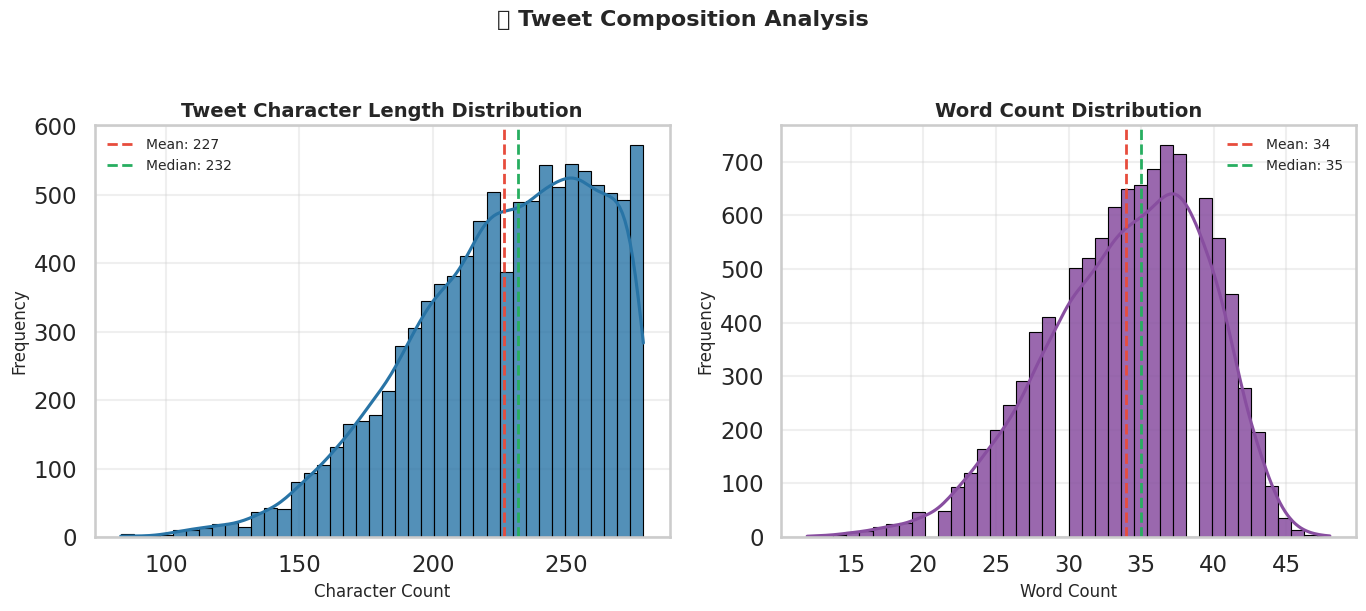


✅ Text characteristics visualized


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set styling
sns.set_style("whitegrid")
sns.set_context("talk")

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Character length distribution with KDE
sns.histplot(df['Text_Length'], bins=40, kde=True, color='#2874A6',
             ax=axes[0], alpha=0.8, edgecolor='black')
axes[0].axvline(df['Text_Length'].mean(), color='#E74C3C', linestyle='--',
                linewidth=2, label=f"Mean: {df['Text_Length'].mean():.0f}")
axes[0].axvline(df['Text_Length'].median(), color='#27AE60', linestyle='--',
                linewidth=2, label=f"Median: {df['Text_Length'].median():.0f}")
axes[0].set_title('Tweet Character Length Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Character Count', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)

# Word count distribution with KDE
sns.histplot(df['Word_Count'], bins=40, kde=True, color='#884EA0',
             ax=axes[1], alpha=0.85, edgecolor='black')
axes[1].axvline(df['Word_Count'].mean(), color='#E74C3C', linestyle='--',
                linewidth=2, label=f"Mean: {df['Word_Count'].mean():.0f}")
axes[1].axvline(df['Word_Count'].median(), color='#27AE60', linestyle='--',
                linewidth=2, label=f"Median: {df['Word_Count'].median():.0f}")
axes[1].set_title('Word Count Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Word Count', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3)

plt.suptitle("📝 Tweet Composition Analysis", fontsize=16, fontweight='bold', y=1.03)
plt.tight_layout()
plt.show()

print("\n✅ Text characteristics visualized")

## 3.3 Temporal Patterns

Analyzing tweet activity over time dimensions.

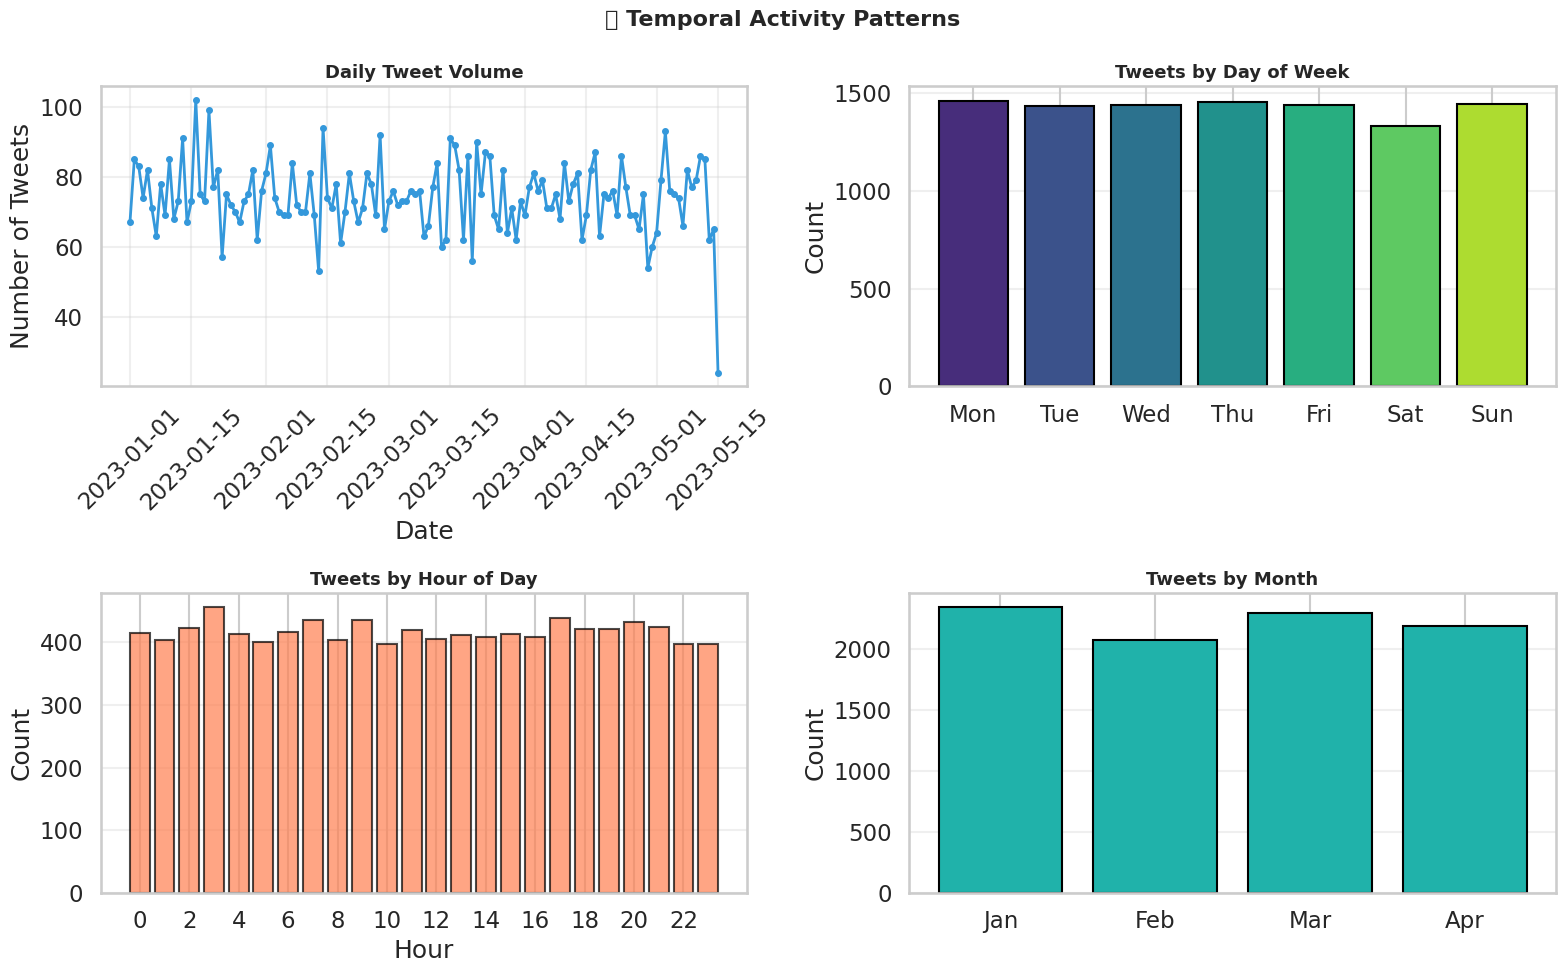


📊 Temporal Insights:
• Most active day: Monday (1461 tweets)
• Peak hour: 3:00 (456 tweets)
• Weekend activity: 2776 tweets (27.8%)


In [9]:
# Temporal analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Daily volume
daily_tweets = df.groupby('Date').size()
axes[0, 0].plot(daily_tweets.index, daily_tweets.values, marker='o',
                linewidth=2, markersize=4, color='#3498db')
axes[0, 0].set_title('Daily Tweet Volume', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Number of Tweets')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['DayOfWeek'].value_counts().reindex(day_order)
axes[0, 1].bar(range(len(day_counts)), day_counts.values,
               color=sns.color_palette("viridis", len(day_counts)), edgecolor='black')
axes[0, 1].set_xticks(range(len(day_counts)))
axes[0, 1].set_xticklabels([d[:3] for d in day_order])
axes[0, 1].set_title('Tweets by Day of Week', fontsize=13, fontweight='bold')
axes[0, 1].set_ylabel('Count')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Hourly pattern
hour_counts = df['Hour'].value_counts().sort_index()
axes[1, 0].bar(hour_counts.index, hour_counts.values,
               color='coral', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Tweets by Hour of Day', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Hour')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xticks(range(0, 24, 2))
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Monthly distribution
monthly_tweets = df.groupby('Month_Name').size()
month_names = ['January', 'February', 'March', 'April']
monthly_tweets = monthly_tweets.reindex(month_names, fill_value=0)
axes[1, 1].bar(range(len(monthly_tweets)), monthly_tweets.values,
               color='lightseagreen', edgecolor='black')
axes[1, 1].set_xticks(range(len(monthly_tweets)))
axes[1, 1].set_xticklabels([m[:3] for m in month_names])
axes[1, 1].set_title('Tweets by Month', fontsize=13, fontweight='bold')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.suptitle("📅 Temporal Activity Patterns", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print insights
print(f"\n📊 Temporal Insights:")
print(f"• Most active day: {day_counts.idxmax()} ({day_counts.max()} tweets)")
print(f"• Peak hour: {hour_counts.idxmax()}:00 ({hour_counts.max()} tweets)")
print(f"• Weekend activity: {df['Is_Weekend'].sum()} tweets ({df['Is_Weekend'].mean()*100:.1f}%)")

---

# **4. TEXT PREPROCESSING & CLEANING**

<div style="background-color: #fff3e0; padding: 15px; border-radius: 8px; border-left: 4px solid #ff9800;">
Preparing text data for NLP analysis through cleaning, normalization, and tokenization.
</div>

## **4.1** **Advanced Text Preprocessing Functions**

In [10]:
def advanced_clean_text(text, remove_stopwords=True, lemmatize=True):
    """
    Advanced text cleaning with multiple preprocessing steps.

    Parameters:
    -----------
    text : str
        Raw text to process
    remove_stopwords : bool
        Remove English stopwords
    lemmatize : bool
        Apply lemmatization

    Returns:
    --------
    str : Cleaned text
    """
    if not isinstance(text, str) or len(text.strip()) == 0:
        return ""

    # Lowercase
    text = text.lower()

    # Remove URLs, mentions, hashtags (keep word after #)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#(\w+)', r'\1', text)

    # Remove special characters but keep apostrophes for contractions
    text = re.sub(r'[^a-zA-Z\s\']', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenization
    tokens = word_tokenize(text)

    # Stopwords removal
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        # Custom additions
        custom_stops = {'would', 'could', 'might', 'get', 'got', 'one', 'two'}
        stop_words.update(custom_stops)
        tokens = [w for w in tokens if w not in stop_words and len(w) > 2]

    # Lemmatization
    if lemmatize:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)


def dual_sentiment_analysis(text):
    """
    Combine VADER and TextBlob for robust sentiment scoring.

    Returns dict with comprehensive sentiment metrics.
    """
    # VADER (better for social media)
    vader_scores = vader.polarity_scores(text)

    # TextBlob (good for general text)
    blob = TextBlob(text)
    textblob_polarity = blob.sentiment.polarity
    textblob_subjectivity = blob.sentiment.subjectivity

    # Ensemble score (weighted average)
    ensemble_polarity = (vader_scores['compound'] * 0.6) + (textblob_polarity * 0.4)

    return {
        'vader_compound': vader_scores['compound'],
        'vader_positive': vader_scores['pos'],
        'vader_negative': vader_scores['neg'],
        'vader_neutral': vader_scores['neu'],
        'textblob_polarity': textblob_polarity,
        'textblob_subjectivity': textblob_subjectivity,
        'ensemble_score': ensemble_polarity
    }


def classify_sentiment(score, threshold=0.05):
    """Classify sentiment based on polarity score."""
    if score > threshold:
        return 'Positive'
    elif score < -threshold:
        return 'Negative'
    else:
        return 'Neutral'


print("✅ Advanced preprocessing functions defined")
print("   → advanced_clean_text(): Multi-stage text cleaning")
print("   → dual_sentiment_analysis(): VADER + TextBlob ensemble")
print("   → classify_sentiment(): Robust classification")

✅ Advanced preprocessing functions defined
   → advanced_clean_text(): Multi-stage text cleaning
   → dual_sentiment_analysis(): VADER + TextBlob ensemble
   → classify_sentiment(): Robust classification


## 4.2 Apply Preprocessing to Dataset

Cleaning all tweets and preparing for analysis.

In [11]:
# Apply cleaning
print("🧹 Cleaning text data...")
df['Cleaned_Text'] = df['Text'].apply(advanced_clean_text)

# Check results
print("✅ Text cleaning completed!")
print(f"\n📊 Sample Comparison (First 3 tweets):")
for i in range(3):
    print(f"\n[Tweet {i+1}]")
    print(f"Original: {df.iloc[i]['Text'][:120]}...")
    print(f"Cleaned:  {df.iloc[i]['Cleaned_Text'][:120]}...")

# Validate
empty_count = (df['Cleaned_Text'].str.strip() == '').sum()
if empty_count > 0:
    print(f"\n⚠️  {empty_count} tweets became empty after cleaning")
    df.loc[df['Cleaned_Text'].str.strip() == '', 'Cleaned_Text'] = df['Text']
else:
    print(f"\n✅ All tweets retained content after cleaning")

🧹 Cleaning text data...
✅ Text cleaning completed!

📊 Sample Comparison (First 3 tweets):

[Tweet 1]
Original: Party least receive say or single. Prevent prevent husband affect. May himself cup style evening protect. Effect another...
Cleaned:  party least receive say single prevent prevent husband affect may cup style evening protect effect another stage perform...

[Tweet 2]
Original: Hotel still Congress may member staff. Media draw buy fly. Identify on another turn minute would.
Local subject way beli...
Cleaned:  hotel still congress may member staff medium draw buy fly identify another turn minute local subject way believe questio...

[Tweet 3]
Original: Nice be her debate industry that year. Film where generation push discover partner level.
Nearly money store style may e...
Cleaned:  nice debate industry year film generation push discover partner level nearly money store style may enjoy kid discus blue...

✅ All tweets retained content after cleaning


---

# **5. COMPREHENSIVE SENTIMENT ANALYSIS**

<div style="background-color: #fce4ec; padding: 15px; border-radius: 8px; border-left: 4px solid #e91e63;">
<b>Dual-Method Approach:</b> Combining VADER (optimized for social media) and TextBlob (general NLP) for robust sentiment detection.
</div>

## **5.1** **Sentiment Scoring**

Applying ensemble sentiment analysis to all tweets.

In [12]:
# Apply sentiment analysis
print("📊 Calculating sentiment scores using dual methods...")
sentiment_results = df['Text'].progress_apply(dual_sentiment_analysis) if 'progress_apply' in dir(df) else df['Text'].apply(dual_sentiment_analysis)

# Extract individual scores
df['VADER_Score'] = sentiment_results.apply(lambda x: x['vader_compound'])
df['VADER_Positive'] = sentiment_results.apply(lambda x: x['vader_positive'])
df['VADER_Negative'] = sentiment_results.apply(lambda x: x['vader_negative'])
df['TextBlob_Polarity'] = sentiment_results.apply(lambda x: x['textblob_polarity'])
df['Subjectivity'] = sentiment_results.apply(lambda x: x['textblob_subjectivity'])
df['Ensemble_Score'] = sentiment_results.apply(lambda x: x['ensemble_score'])

# Classify using ensemble score
df['Sentiment_Label'] = df['Ensemble_Score'].apply(classify_sentiment)

print("✅ Sentiment analysis complete!")
print(f"\n📊 SENTIMENT STATISTICS")
print("=" * 80)
print(f"VADER Compound: {df['VADER_Score'].mean():.4f} (±{df['VADER_Score'].std():.4f})")
print(f"TextBlob Polarity: {df['TextBlob_Polarity'].mean():.4f} (±{df['TextBlob_Polarity'].std():.4f})")
print(f"Ensemble Score: {df['Ensemble_Score'].mean():.4f} (±{df['Ensemble_Score'].std():.4f})")
print(f"Average Subjectivity: {df['Subjectivity'].mean():.4f}")

# Display sample
print(f"\n📝 Sample Results:")
display(df[['Text', 'VADER_Score', 'TextBlob_Polarity', 'Ensemble_Score', 'Sentiment_Label']].head(5))

📊 Calculating sentiment scores using dual methods...
✅ Sentiment analysis complete!

📊 SENTIMENT STATISTICS
VADER Compound: 0.4430 (±0.4522)
TextBlob Polarity: 0.0952 (±0.1290)
Ensemble Score: 0.3039 (±0.2945)
Average Subjectivity: 0.4258

📝 Sample Results:


Text  \
0  Party least receive say or single. Prevent prevent husband affect. May himself cup style evening protect. Effect another themselves stage perform....   
1  Hotel still Congress may member staff. Media draw buy fly. Identify on another turn minute would.\nLocal subject way believe which question some m...   
2  Nice be her debate industry that year. Film where generation push discover partner level.\nNearly money store style may enjoy. Kid discuss blue sa...   
3  Laugh explain situation career occur serious. Five particular important size.\nCatch continue east teach dark discussion spring. Then candidate fi...   
4  Involve sense former often approach government. While season family term close do number. Cost through second image indeed.\nProduction thousand w...   

   VADER_Score  TextBlob_Polarity  Ensemble_Score Sentiment_Label  
0       0.8885           0.115714        0.579386        Positive  
1       0.2960           0.308333        0.300933        Positive  
2       0.8481           0.220000        0.596860        Positive  
3       0.6249           0.054762        0.396845        Positive  
4       0.6705           0.033333        0.415633        Positive

## 5.2 Sentiment Distribution & Insights

Interactive visualization dashboard showing sentiment patterns.

In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Distribution analysis
sent_counts = df['Sentiment_Label'].value_counts()

# Create interactive dashboard
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Sentiment Distribution', 'Score Distributions',
                    'Sentiment Over Time', 'Engagement by Sentiment'),
    specs=[[{'type': 'pie'}, {'type': 'box'}],
           [{'type': 'scatter'}, {'type': 'bar'}]]
)

# Pie chart
fig.add_trace(
    go.Pie(labels=sent_counts.index, values=sent_counts.values,
           marker=dict(colors=['#2ecc71', '#e74c3c', '#95a5a6'])),
    row=1, col=1
)

# Box plots
for sent in ['Positive', 'Negative', 'Neutral']:
    data = df[df['Sentiment_Label'] == sent]['Ensemble_Score']
    fig.add_trace(go.Box(y=data, name=sent), row=1, col=2)

# Temporal trend
daily_sent = df.groupby(['Date', 'Sentiment_Label']).size().unstack(fill_value=0)
for sent in daily_sent.columns:
    fig.add_trace(
        go.Scatter(x=daily_sent.index, y=daily_sent[sent],
                   mode='lines', name=sent),
        row=2, col=1
    )

# Engagement by sentiment
avg_eng = df.groupby('Sentiment_Label')['Total_Engagement'].mean()
fig.add_trace(
    go.Bar(x=avg_eng.index, y=avg_eng.values,
           marker=dict(color=['#2ecc71', '#e74c3c', '#95a5a6'])),
    row=2, col=2
)

fig.update_layout(height=800, showlegend=True, title_text="📊 Comprehensive Sentiment Dashboard")
fig.show()

print(f"\n📈 KEY INSIGHTS:")
print(f"• Dominant sentiment: {sent_counts.idxmax()} ({sent_counts.max()/len(df)*100:.1f}%)")
print(f"• Sentiment-Engagement correlation: {df['Ensemble_Score'].corr(df['Total_Engagement']):.3f}")


📈 KEY INSIGHTS:
• Dominant sentiment: Positive (79.2%)
• Sentiment-Engagement correlation: -0.011


## 5.3 Word Clouds
Creating word clouds in-order to visualise each sentiment category (positive, negative and neutral).

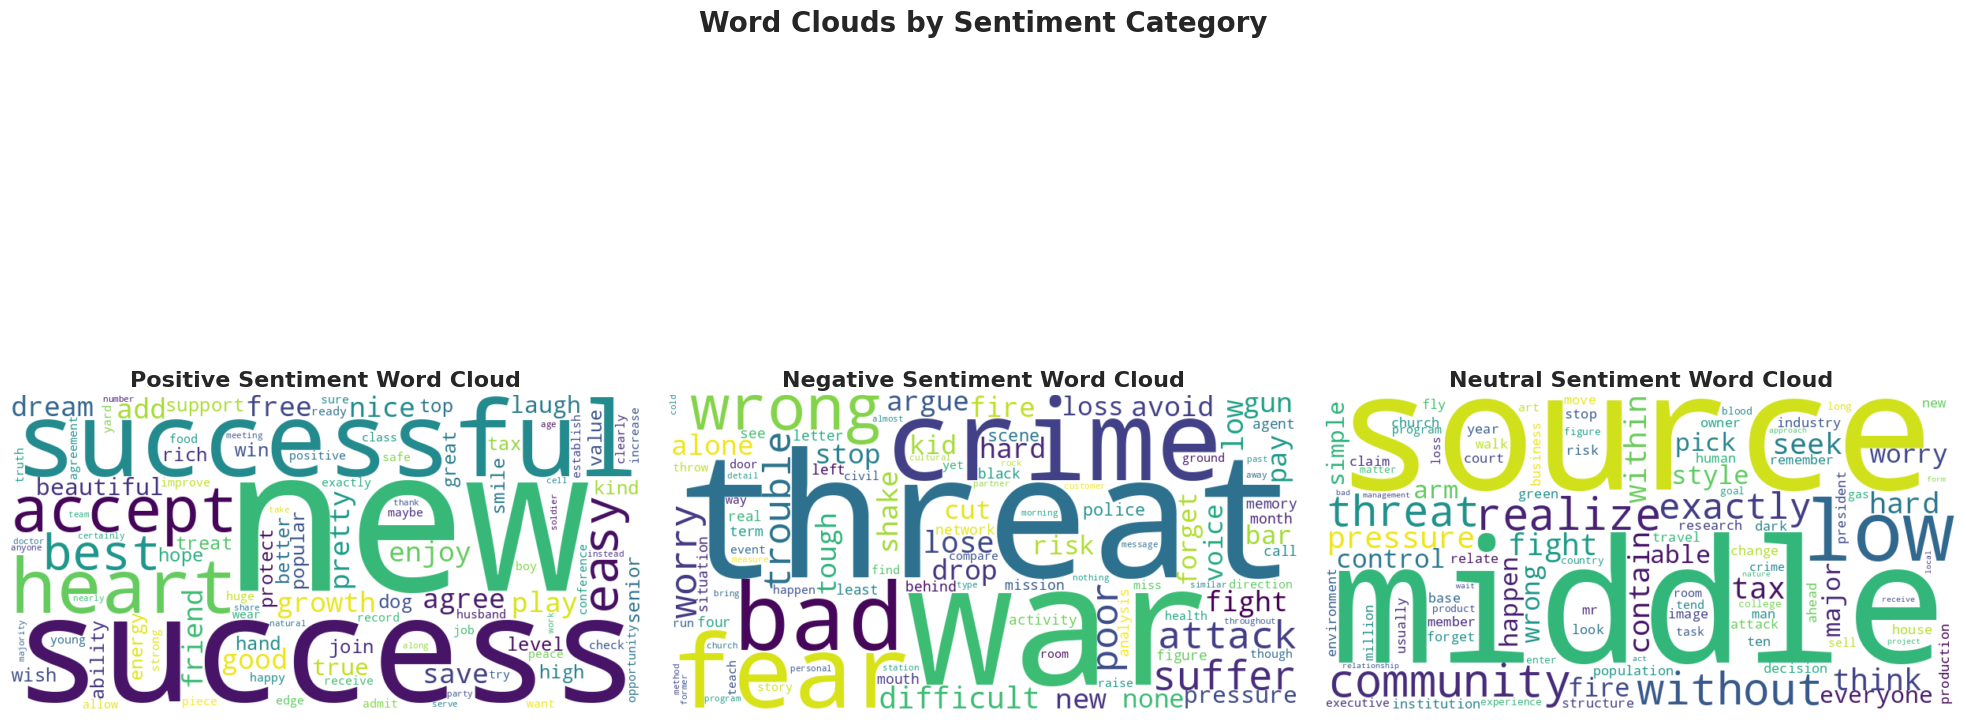

✅ Word clouds for Positive, Negative, and Neutral sentiments generated and displayed.


In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define the sentiment labels
sentiments = ['Positive', 'Negative', 'Neutral']
sentiment_texts = {}

# Prepare text data for each sentiment
for sentiment in sentiments:
    filtered_df = df[df['Sentiment_Label'] == sentiment]
    sentiment_texts[sentiment] = ' '.join(filtered_df['Cleaned_Text'])

# Create a figure to hold all word clouds
plt.figure(figsize=(20, 10))

# Generate and display word clouds for each sentiment
for i, sentiment in enumerate(sentiments):
    ax = plt.subplot(1, 3, i + 1) # 1 row, 3 columns, current plot index

    # Generate word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        max_words=100,
        collocations=False # Set to False to prevent repeating words
    ).generate(sentiment_texts[sentiment])

    # Display the generated image:
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'{sentiment} Sentiment Word Cloud', fontsize=16, fontweight='bold')

plt.suptitle('Word Clouds by Sentiment Category', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()

print("✅ Word clouds for Positive, Negative, and Neutral sentiments generated and displayed.")

---

# **6. TOPIC MODELING & THEMATIC ANALYSIS**

<div style="background-color: #e1f5fe; padding: 15px; border-radius: 8px; border-left: 4px solid #03a9f4;">
<b>Hybrid Approach:</b> Using both LDA (interpretable) and BERTopic (state-of-the-art) for comprehensive theme extraction.
</div>

## **6.1** **Text Preparation for Topic Modeling**

In [14]:
# Prepare documents
documents = df['Cleaned_Text'].apply(lambda x: x.split()).tolist()
documents = [doc for doc in documents if len(doc) >= 3]

# Build dictionary and corpus
dictionary = corpora.Dictionary(documents)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in documents]

print(f"✅ Prepared {len(documents)} documents")
print(f"📖 Dictionary size: {len(dictionary)} unique tokens")

## 6.2 Coherence-Based Topic Optimization

✅ Prepared 10000 documents
📖 Dictionary size: 857 unique tokens


In [15]:
# Find optimal topics
print("🔍 Finding optimal number of topics...")
topic_range = range(3, 16, 2)
coherence_scores = []

for num in topic_range:
    lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num,
                   random_state=42, passes=10)
    cm = CoherenceModel(model=lda, texts=documents, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(cm.get_coherence())
    print(f"  {num} topics: coherence = {coherence_scores[-1]:.4f}")

optimal_topics = list(topic_range)[np.argmax(coherence_scores)]
print(f"\n✅ Optimal: {optimal_topics} topics (coherence: {max(coherence_scores):.4f})")

# Train final model
lda_final = LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_topics,
                     random_state=42, passes=15, iterations=400)

print(f"\n📊 Topics and Keywords:")
for idx, topic in lda_final.print_topics(-1, num_words=6):
    print(f"Topic {idx}: {topic}")

🔍 Finding optimal number of topics...
  3 topics: coherence = 0.2467
  5 topics: coherence = 0.2576
  7 topics: coherence = 0.2492
  9 topics: coherence = 0.2563
  11 topics: coherence = 0.2575
  13 topics: coherence = 0.2574
  15 topics: coherence = 0.2621

✅ Optimal: 15 topics (coherence: 0.2621)

📊 Topics and Keywords:
Topic 0: 0.006*"plan" + 0.006*"dark" + 0.006*"environment" + 0.005*"message" + 0.005*"dinner" + 0.005*"minute"
Topic 1: 0.007*"scene" + 0.006*"back" + 0.006*"like" + 0.006*"send" + 0.005*"value" + 0.005*"kind"
Topic 2: 0.007*"candidate" + 0.006*"stage" + 0.006*"population" + 0.006*"total" + 0.005*"help" + 0.005*"force"
Topic 3: 0.006*"forward" + 0.006*"center" + 0.006*"maybe" + 0.006*"affect" + 0.005*"modern" + 0.005*"trade"
Topic 4: 0.007*"discover" + 0.007*"space" + 0.006*"man" + 0.006*"skin" + 0.006*"professor" + 0.006*"find"
Topic 5: 0.009*"remember" + 0.009*"phone" + 0.007*"tough" + 0.007*"trial" + 0.007*"child" + 0.006*"year"
Topic 6: 0.006*"ability" + 0.006*"ch

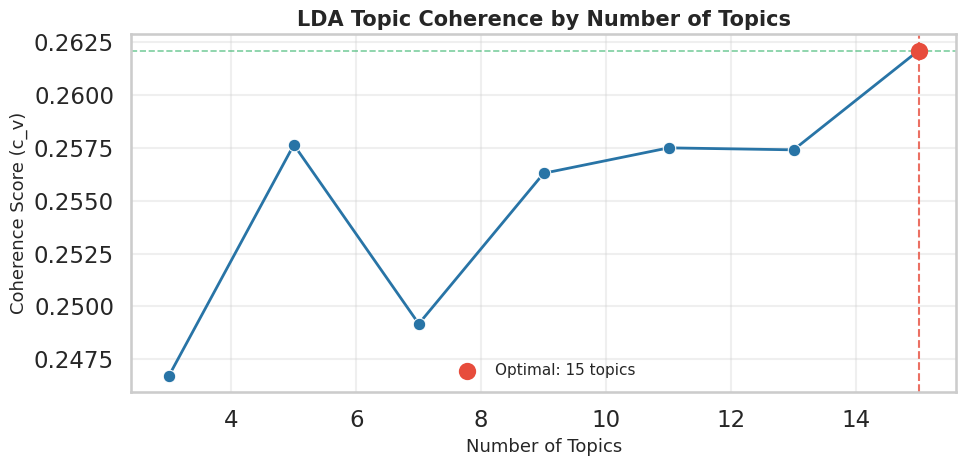

In [16]:

# Assume topic_range and coherence_scores are already defined from your loop
plt.figure(figsize=(10,5))
sns.lineplot(x=list(topic_range), y=coherence_scores, marker='o', linewidth=2, color='#2874A6')

# Mark optimal point
optimal_idx = int(np.argmax(coherence_scores))
optimal_topic_num = list(topic_range)[optimal_idx]
optimal_coh = coherence_scores[optimal_idx]
plt.scatter(optimal_topic_num, optimal_coh, color='#e74c3c', s=120, zorder=10, label=f'Optimal: {optimal_topic_num} topics')

plt.axvline(optimal_topic_num, color='#e74c3c', linestyle='--', linewidth=1.5, alpha=0.8)
plt.axhline(optimal_coh, color='#27AE60', linestyle='--', linewidth=1.2, alpha=0.6)

plt.title("LDA Topic Coherence by Number of Topics", fontsize=15, fontweight='bold')
plt.xlabel("Number of Topics", fontsize=13)
plt.ylabel("Coherence Score (c_v)", fontsize=13)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# **6.2. TRAINING LDA MODEL**
---


In [17]:


# Use the previously determined optimal_topics, dictionary, and corpus
print(f"🔨 Training final LDA model with {optimal_topics} topics...")

lda_final = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=optimal_topics,
    random_state=42,
    passes=15,
    iterations=400,
    alpha='auto',
    eta='auto',
    per_word_topics=True
)

print("✅ Final LDA model trained!")

# Display top keywords for each topic
print("\n📊 Topics and their top keywords:")
for idx, topic in lda_final.print_topics(num_words=8):
    print(f"Topic {idx}: {topic}")


🔨 Training final LDA model with 15 topics...
✅ Final LDA model trained!

📊 Topics and their top keywords:
Topic 0: 0.007*"dark" + 0.006*"environment" + 0.005*"bad" + 0.005*"plan" + 0.005*"message" + 0.005*"direction" + 0.005*"political" + 0.005*"best"
Topic 1: 0.007*"scene" + 0.007*"back" + 0.006*"send" + 0.006*"like" + 0.005*"woman" + 0.005*"value" + 0.005*"kind" + 0.005*"table"
Topic 2: 0.006*"candidate" + 0.006*"total" + 0.006*"force" + 0.006*"help" + 0.005*"position" + 0.005*"cell" + 0.005*"lead" + 0.005*"study"
Topic 3: 0.006*"affect" + 0.006*"develop" + 0.006*"forward" + 0.005*"maybe" + 0.005*"instead" + 0.005*"impact" + 0.005*"kid" + 0.005*"win"
Topic 4: 0.006*"skin" + 0.006*"professor" + 0.006*"discover" + 0.006*"task" + 0.005*"send" + 0.005*"man" + 0.005*"special" + 0.005*"space"
Topic 5: 0.008*"phone" + 0.007*"child" + 0.007*"remember" + 0.007*"trial" + 0.006*"tough" + 0.006*"agent" + 0.005*"year" + 0.005*"forget"
Topic 6: 0.007*"fish" + 0.006*"change" + 0.006*"daughter" + 0.

In [18]:

# Evaluate coherence for your final model (use c_v for interpretability)
coherence_model_final = CoherenceModel(
    model=lda_final,
    texts=documents,            # tokenized texts used for modeling
    dictionary=dictionary,
    coherence='c_v'             # can also use 'u_mass', 'c_uci', etc.
)
final_coherence = coherence_model_final.get_coherence()

print(f"\n✅ Final LDA Model Coherence Score (c_v): {final_coherence:.4f}")



✅ Final LDA Model Coherence Score (c_v): 0.2594


---

# **6.3. TOPIC KEYWORDS**

<div style="background-color: #e8f5e9; padding: 15px; border-radius: 8px; border-left: 4px solid #4caf50;">
Extract the most representative words for each identified topic and visualize their relative importance within topics to enable human interpretation of thematic content.
</div>


📊 IDENTIFIED TOPICS AND KEYWORDS
Top keywords for each topic:
--------------------------------------------------------------------------------

Topic 0:
  Keywords: dark, environment, bad, plan, message, direction, political, best, deal, appear
  Top word weights: 0.007, 0.006, 0.005, 0.005, 0.005

Topic 1:
  Keywords: scene, back, send, like, woman, value, kind, table, say, city
  Top word weights: 0.007, 0.007, 0.006, 0.006, 0.005

Topic 2:
  Keywords: candidate, total, force, help, position, cell, lead, study, long, beyond
  Top word weights: 0.006, 0.006, 0.006, 0.006, 0.005

Topic 3:
  Keywords: affect, develop, forward, maybe, instead, impact, kid, win, near, support
  Top word weights: 0.006, 0.006, 0.006, 0.005, 0.005

Topic 4:
  Keywords: skin, professor, discover, task, send, man, special, space, reduce, pas
  Top word weights: 0.006, 0.006, 0.006, 0.006, 0.005

Topic 5:
  Keywords: phone, child, remember, trial, tough, agent, year, forget, hear, bill
  Top word weights: 0.00

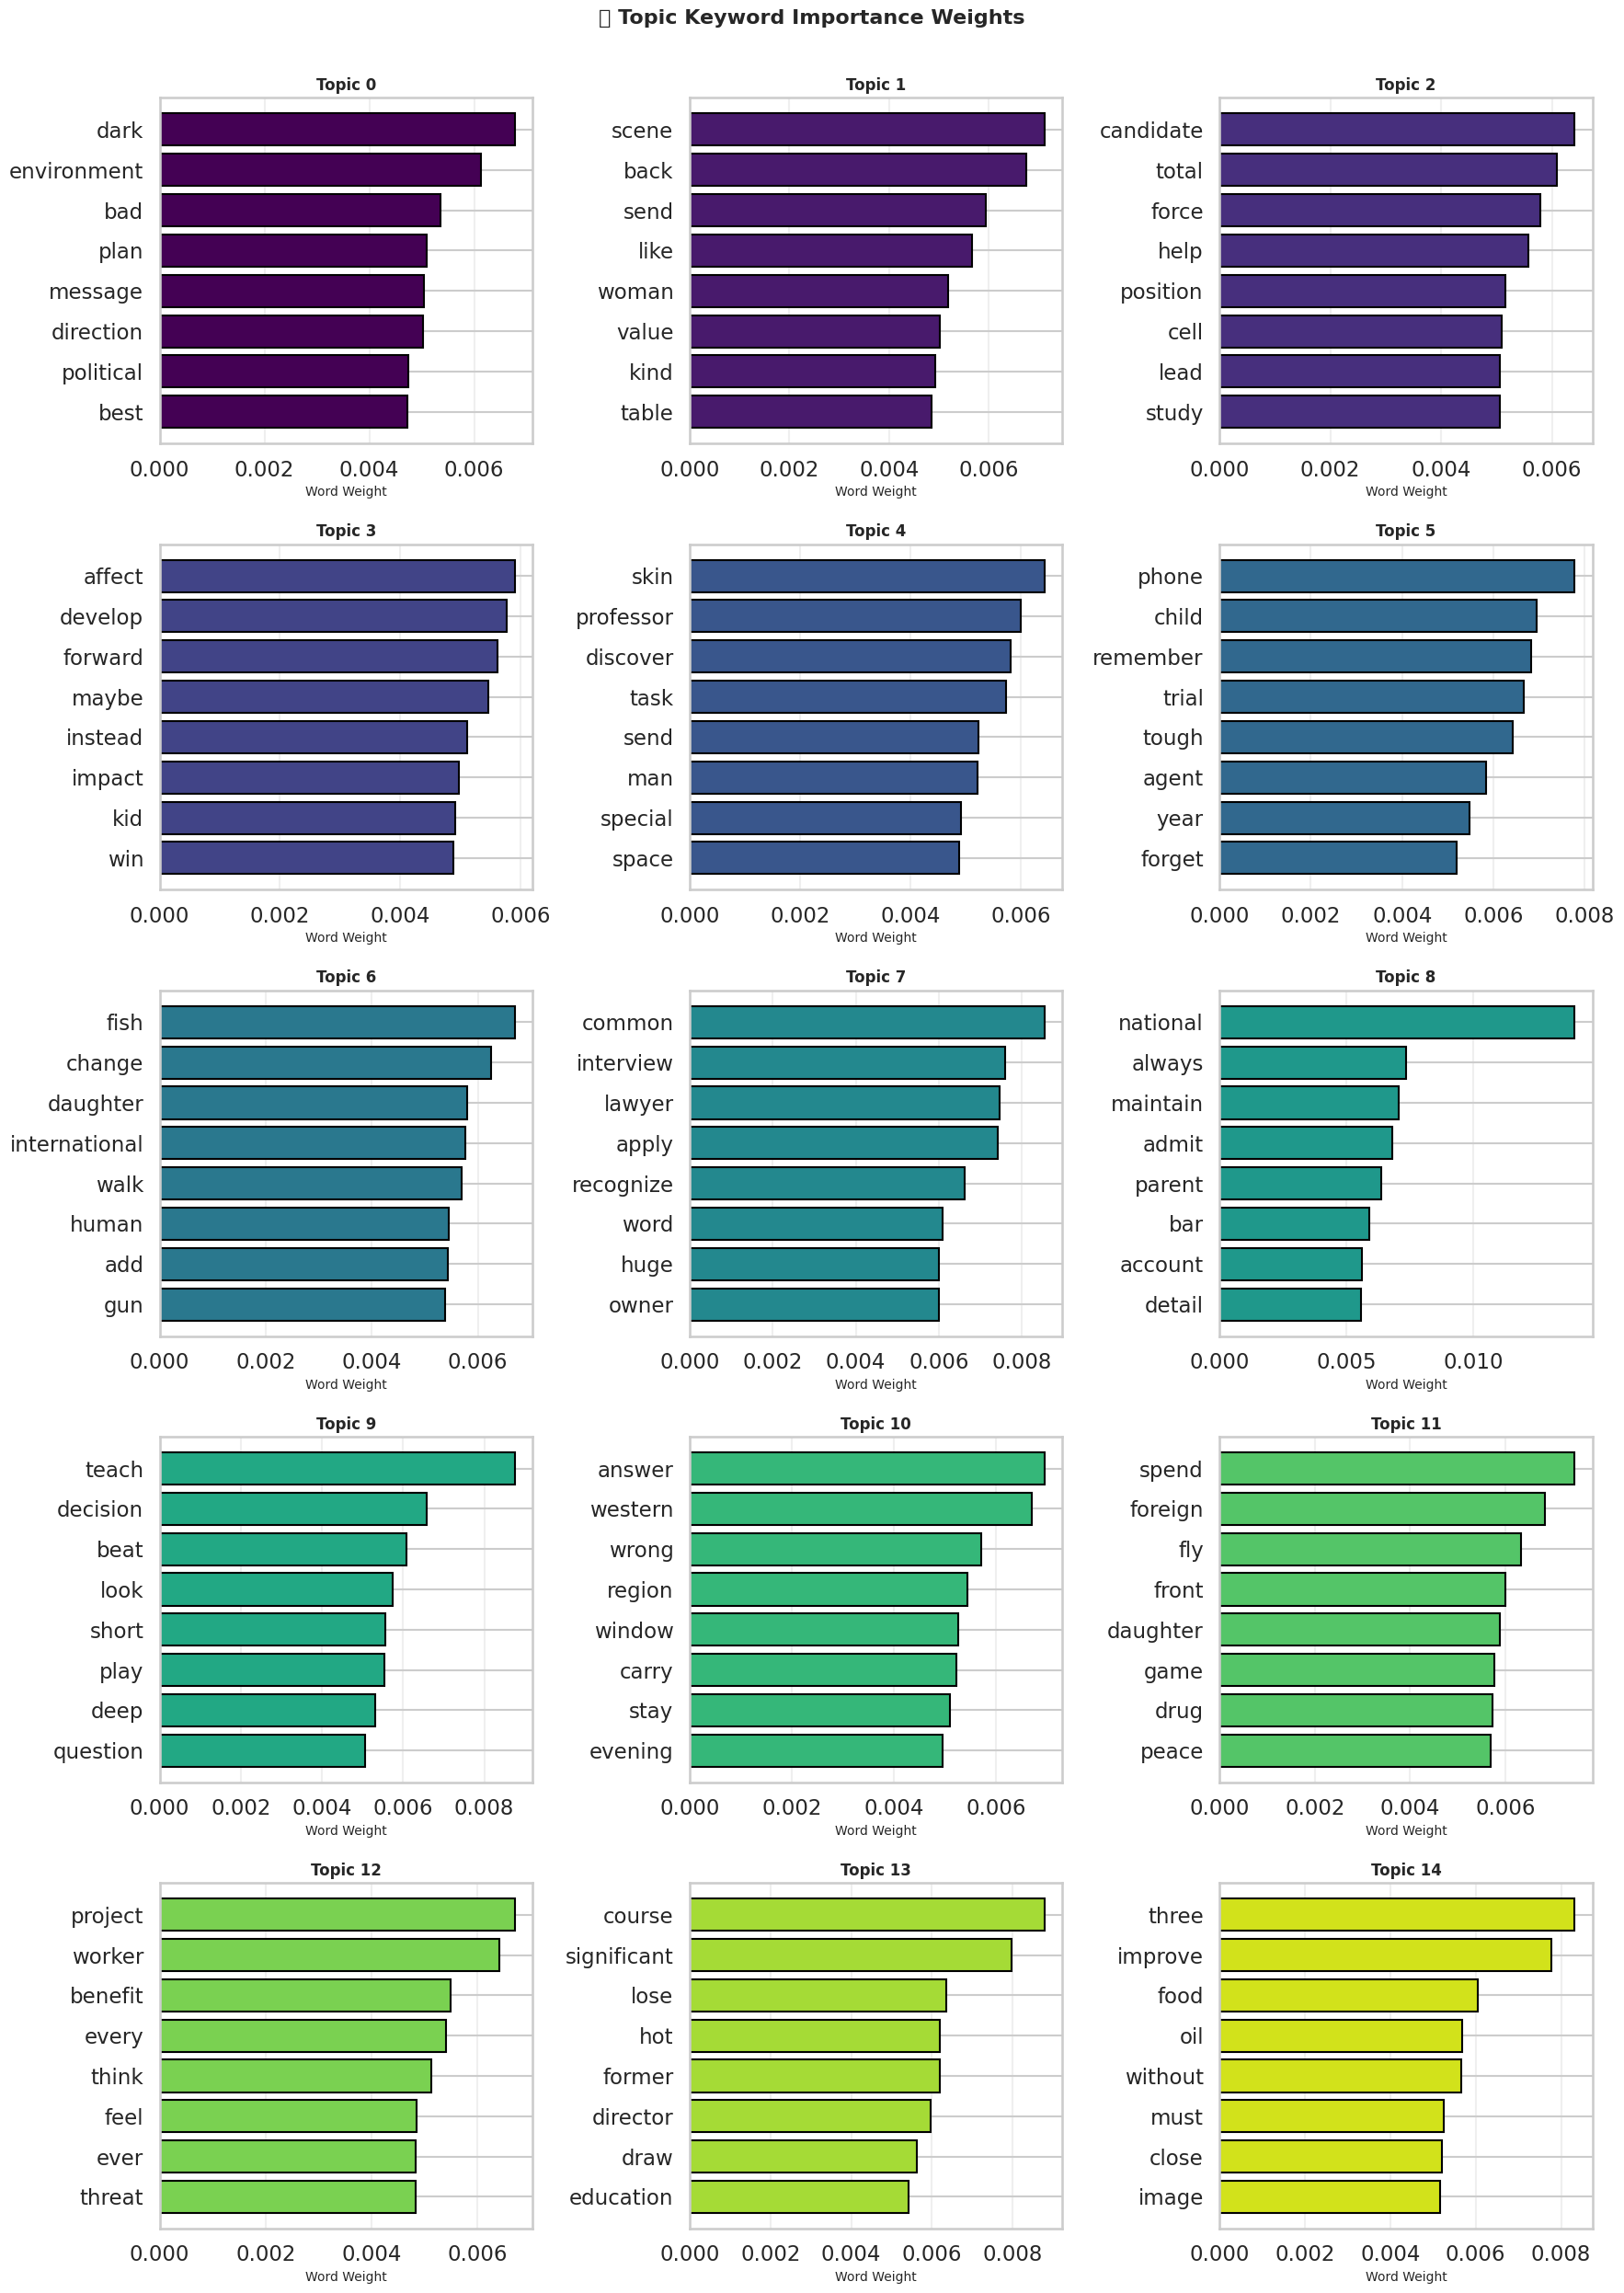


✅ Topic keywords extracted and visualized


In [19]:
# Extract topics and keywords
print("📊 IDENTIFIED TOPICS AND KEYWORDS")
print("=" * 80)
print("Top keywords for each topic:")
print("-" * 80)

topics_dict = {}
for idx, topic in lda_final.show_topics(num_topics=-1, num_words=15, formatted=False):
    topics_dict[idx] = topic
    words = [word for word, prob in topic]
    probs = [prob for word, prob in topic]

    print(f"\nTopic {idx}:")
    print(f"  Keywords: {', '.join(words[:10])}")
    print(f"  Top word weights: {', '.join([f'{p:.3f}' for p in probs[:5]])}")

# Visualize keywords as bar charts
num_cols = 3
num_rows = (optimal_topics + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
axes = axes.flatten() if optimal_topics > 1 else [axes]

for idx, topic in topics_dict.items():
    words = [w for w, p in topic[:8]]
    weights = [p for w, p in topic[:8]]

    ax = axes[idx]
    ax.barh(words, weights, color=plt.cm.viridis(idx / optimal_topics), edgecolor='black')
    ax.set_title(f'Topic {idx}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Word Weight', fontsize=10)
    ax.invert_yaxis()
    ax.grid(alpha=0.3, axis='x')

# Hide unused subplots
for idx in range(optimal_topics, len(axes)):
    axes[idx].axis('off')

plt.suptitle('📊 Topic Keyword Importance Weights', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n✅ Topic keywords extracted and visualized")


---

#  **6.4. TOPIC WORD CLOUDS**

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px; border-left: 4px solid #8bc34a;">
Create visually intuitive word cloud representations for each topic, where word size corresponds to its importance within that topic's vocabulary distribution.
</div>



☁️ GENERATING TOPIC WORD CLOUDS


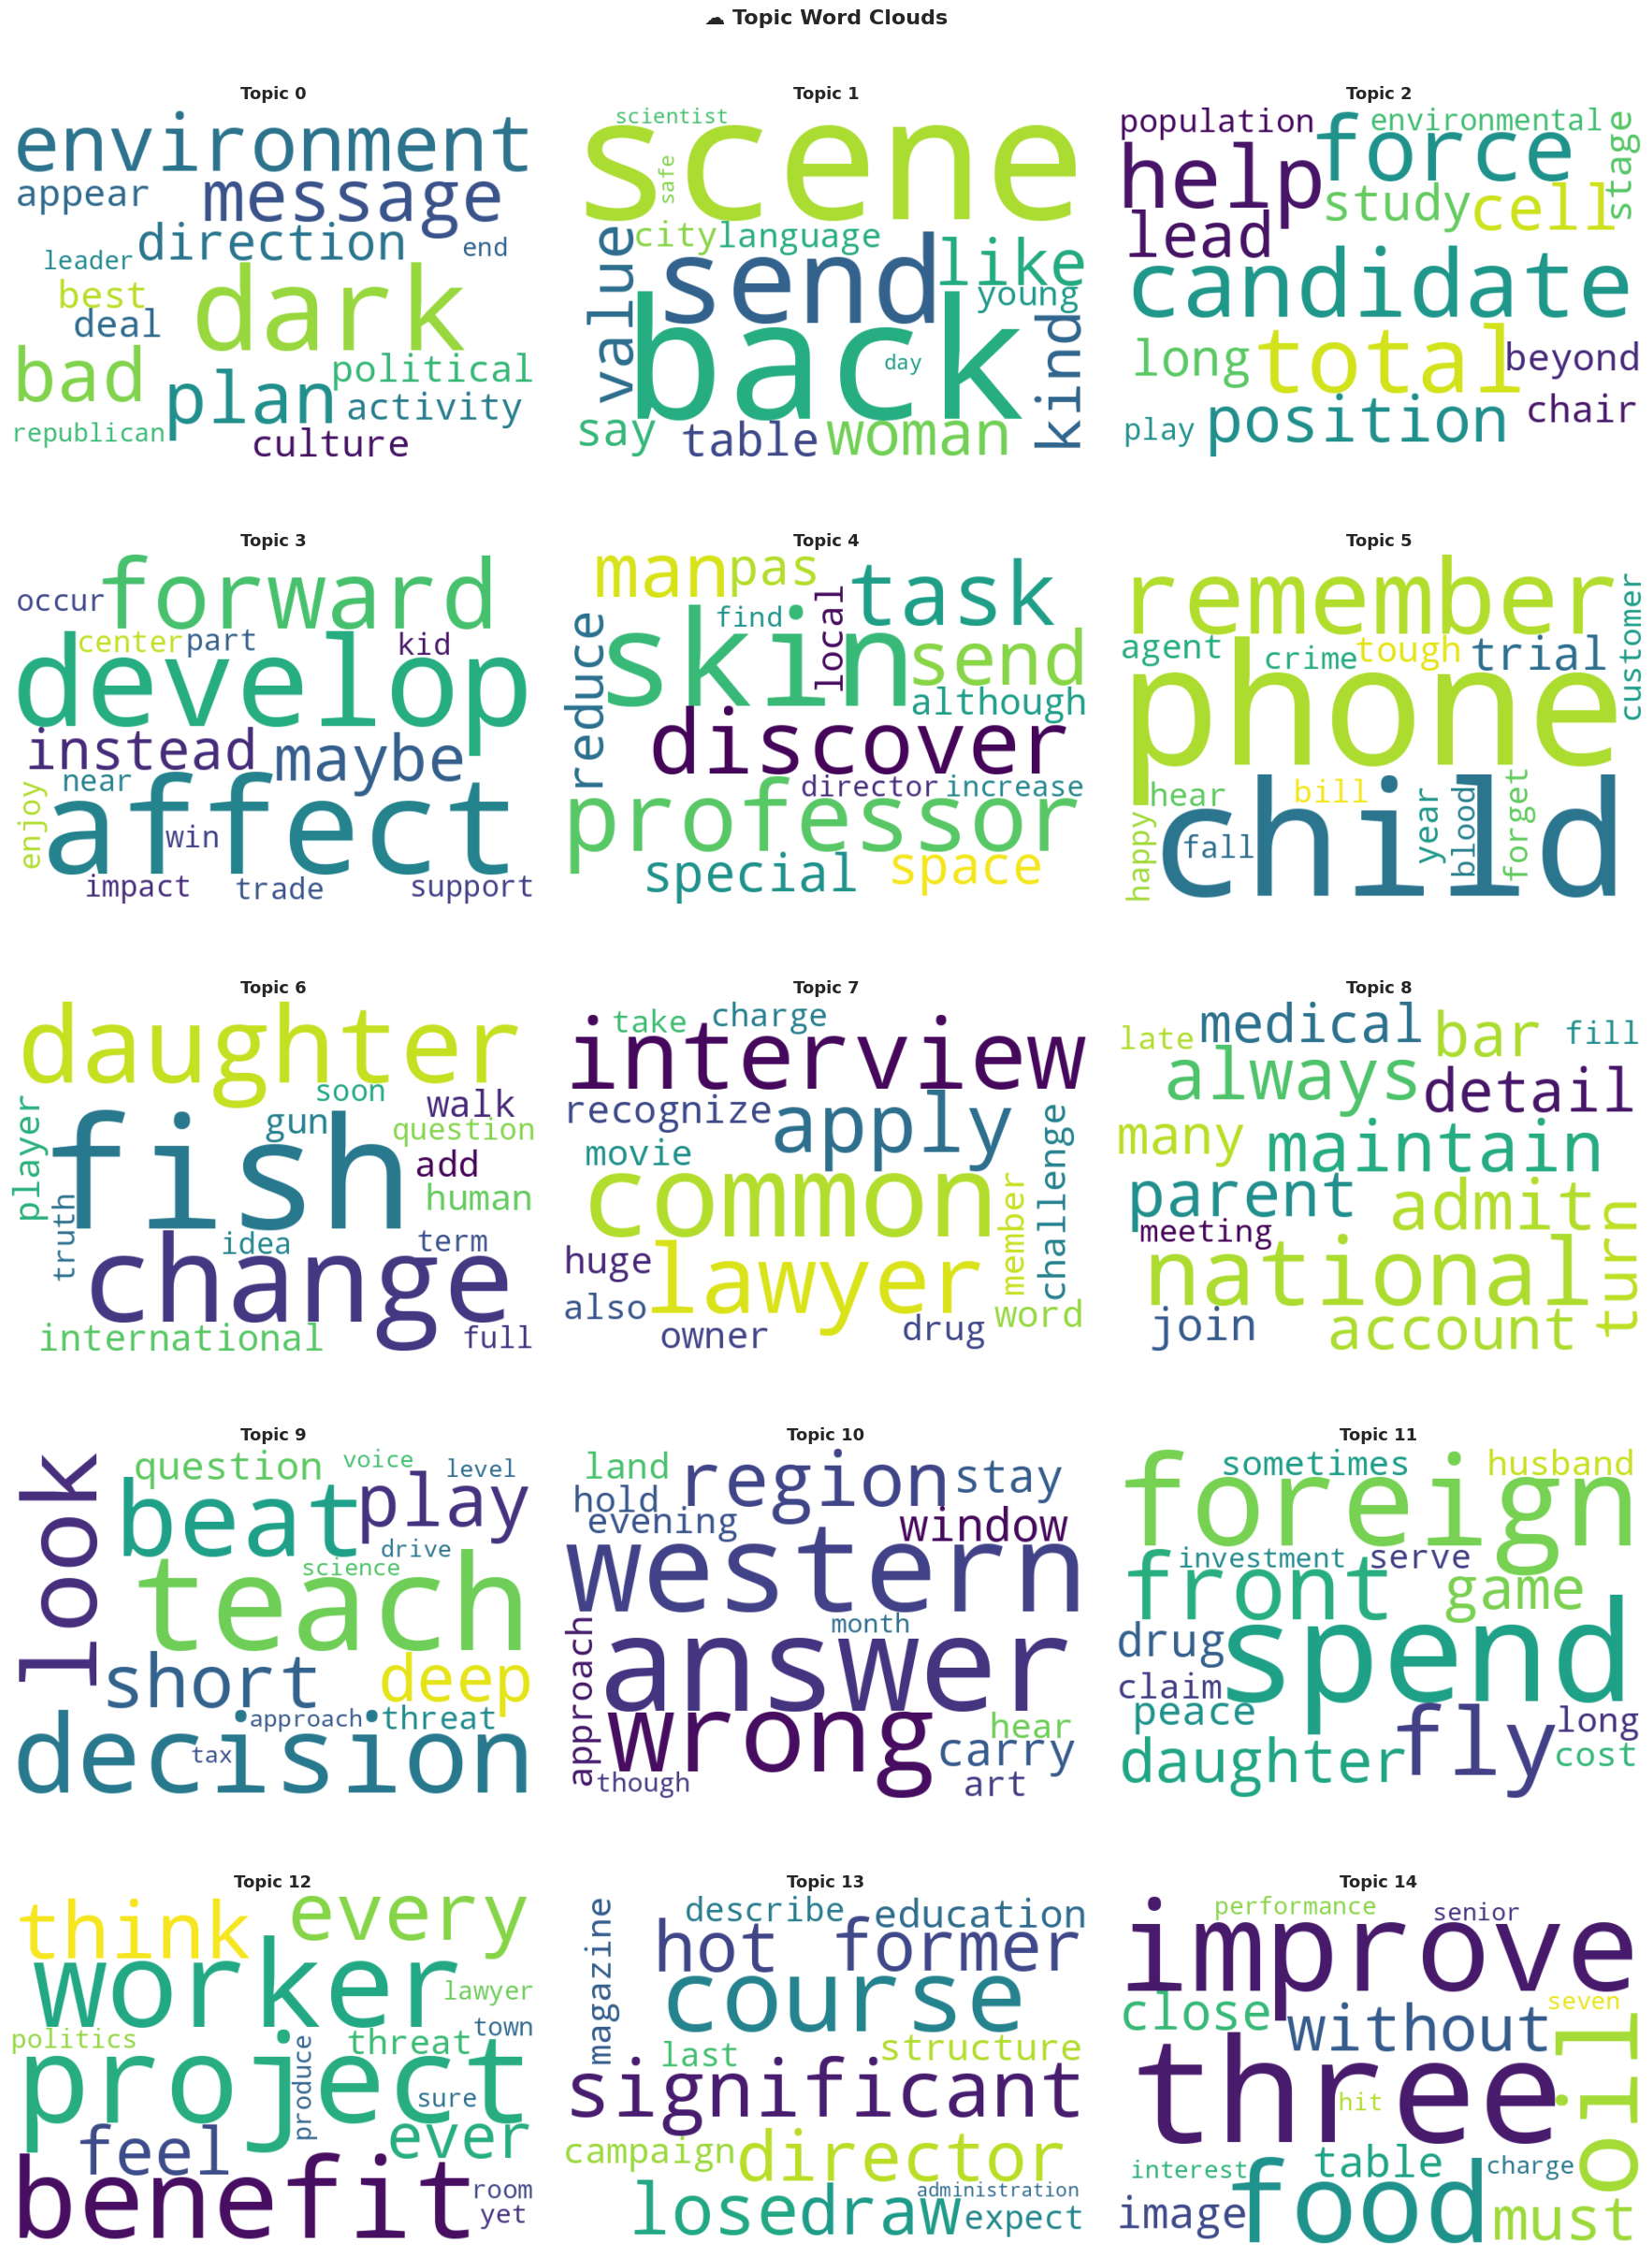

✅ Word clouds generated successfully!


In [20]:
from wordcloud import WordCloud

# Generate word clouds for each topic
print("☁️ GENERATING TOPIC WORD CLOUDS")
print("=" * 80)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
axes = axes.flatten() if optimal_topics > 1 else [axes]

for idx, topic in topics_dict.items():
    # Create word frequency dictionary
    word_freq = {word: float(prob) for word, prob in topic}

    # Generate word cloud
    wordcloud = WordCloud(
        width=600,
        height=400,
        background_color='white',
        colormap='viridis',
        relative_scaling=0.5,
        min_font_size=10
    ).generate_from_frequencies(word_freq)

    # Plot
    ax = axes[idx]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Topic {idx}', fontsize=13, fontweight='bold')
    ax.axis('off')

# Hide unused subplots
for idx in range(optimal_topics, len(axes)):
    axes[idx].axis('off')

plt.suptitle('☁️ Topic Word Clouds', fontsize=16, fontweight='bold', y=0.99)
plt.tight_layout()
plt.show()

print("✅ Word clouds generated successfully!")


## **6.5. Generating Descriptive Topic Labels**

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px; border-left: 4px solid #8bc34a;">
This section creates human-readable labels for each identified topic, replacing generic numeric IDs with short, descriptive phrases derived from their most prominent keywords. This significantly enhances the interpretability and communication of the topic modeling results across all visualizations and analyses.
</div>

---

#  **6.6. Interactive Topic Distribution and Confidence Analysis**

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px; border-left: 4px solid #8bc34a;">
Assigned each document to its dominant topic and visualize the distribution using interactive visualizations that allow for exploration of topic prevalence and model confidence levels.
</div>


In [34]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assign dominant topic to each document
doc_topics = []
for doc_bow in corpus:
    topic_dist = lda_final.get_document_topics(doc_bow)
    if topic_dist:
        dominant = max(topic_dist, key=lambda x: x[1])
        doc_topics.append({'topic': dominant[0], 'probability': dominant[1]})
    else:
        doc_topics.append({'topic': -1, 'probability': 0})

# Create dataframe
topic_df = pd.DataFrame(doc_topics)
df['Dominant_Topic'] = topic_df['topic'].values
df['Topic_Confidence'] = topic_df['probability'].values

# Topic distribution
topic_counts = df[df['Dominant_Topic'] != -1]['Dominant_Topic'].value_counts().sort_index()

# Use the manually defined topic_labels (topic_id_to_label)
# Ensure all topic_counts.index topics have a label, if not, use a fallback
plotly_topic_labels = [topic_id_to_label.get(i, f'Topic {i}') for i in topic_counts.index]

# Create interactive sunburst + treemap combo
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Topic Size Distribution", "Topic Confidence Levels"),
    specs=[[{'type': 'domain'}, {'type': 'box'}]]
)

# Sunburst chart
fig.add_trace(
    go.Sunburst(
        labels=plotly_topic_labels,
        parents=["Topics"] * len(topic_counts),
        values=topic_counts.values,
        marker=dict(colorscale='Viridis'),
        hovertemplate='<b>%{label}</b><br>Tweets: %{value}<extra></extra>'
    ),
    row=1, col=1
)

# Box plot of confidence by topic
for topic_id in sorted(df['Dominant_Topic'].unique()):
    if topic_id != -1:
        fig.add_trace(
            go.Box(
                y=df[df['Dominant_Topic'] == topic_id]['Topic_Confidence'],
                name=topic_id_to_label.get(topic_id, f'Topic {topic_id}'), # Use descriptive label here
                marker_color=px.colors.qualitative.Plotly[topic_id % 10]
            ),
            row=1, col=2
        )

fig.update_layout(
    height=500,
    title_text="🔍 Interactive Topic Distribution & Confidence Analysis",
    showlegend=False
)
fig.show()

print(f"\n✅ {len(topic_counts)} topics identified")
print(f"📊 Average topic assignment confidence: {df['Topic_Confidence'].mean():.3f}")


✅ 15 topics identified
📊 Average topic assignment confidence: 0.483


---

#  **6.7. Topic Quality and Interpretability Assessment**

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px; border-left: 4px solid #8bc34a;">
Quantitatively evaluate topic model quality beyond coherence score by measuring topic diversity, exclusivity, and assignment confidence to assess interpretability and distinctiveness.
</div>


📊 TOPIC QUALITY METRICS DASHBOARD
Overall Topic Diversity: 0.872 (higher = more distinct topics)
Model Coherence (c_v): 0.259

Per-Topic Metrics:


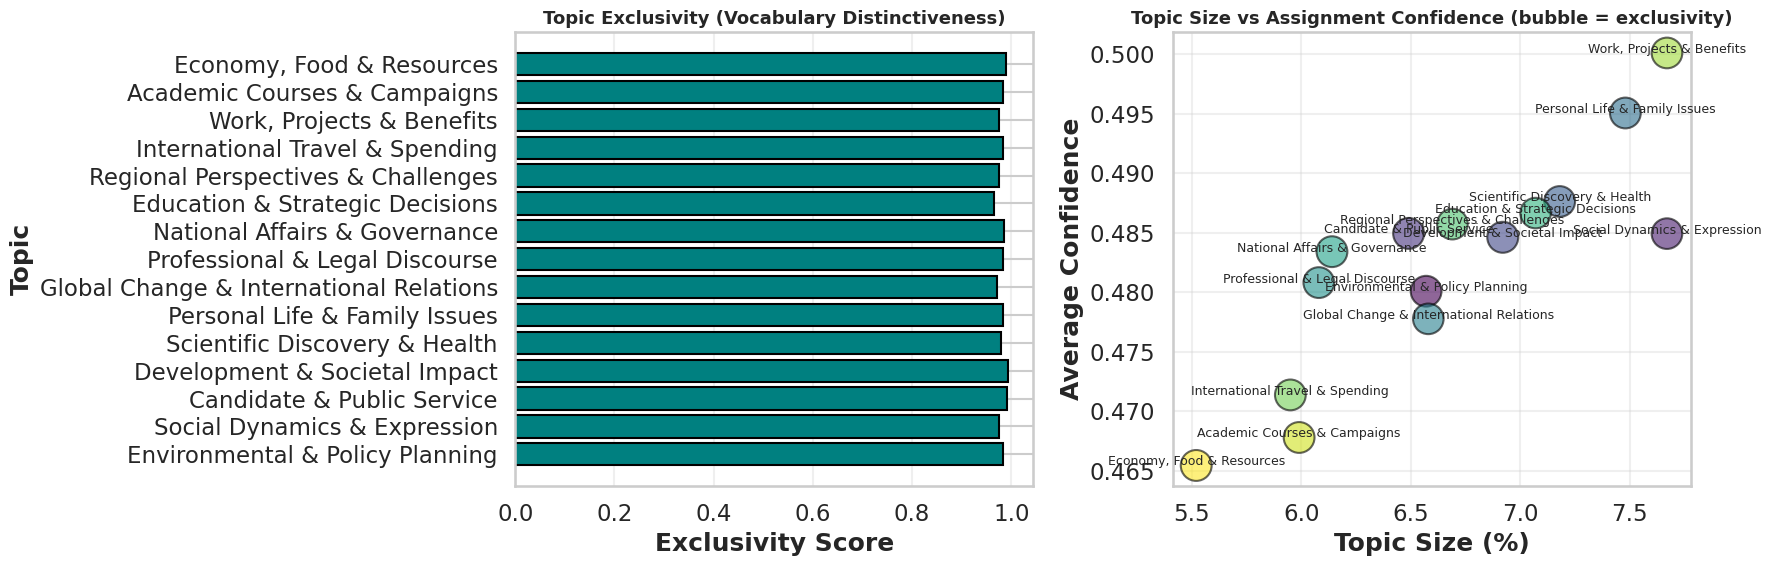

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_topic_diversity(lda_model, num_words=25):
    """
    Measures how diverse topics are (1 = all unique words, 0 = all overlap)
    """
    all_words = set()
    topic_words = []

    for idx in range(lda_model.num_topics):
        words = [w for w, _ in lda_model.show_topic(idx, topn=num_words)]
        topic_words.append(set(words))
        all_words.update(words)

    unique_words = len(all_words)
    total_words = lda_model.num_topics * num_words
    diversity = unique_words / total_words

    return diversity, topic_words

def calculate_topic_exclusivity(topic_word_sets):
    """
    Measures how exclusive each topic's words are (low overlap = high exclusivity)
    """
    exclusivity_scores = []

    for i, topic_set in enumerate(topic_word_sets):
        other_topics = [s for j, s in enumerate(topic_word_sets) if j != i]
        if other_topics:
            overlap = sum(len(topic_set & other) for other in other_topics)
            exclusivity = 1 - (overlap / (len(topic_set) * len(other_topics)))
            exclusivity_scores.append(exclusivity)

    return exclusivity_scores

# Calculate metrics
diversity, topic_word_sets = calculate_topic_diversity(lda_final)
exclusivity_scores = calculate_topic_exclusivity(topic_word_sets)

# Create quality report
quality_df = pd.DataFrame({
    'Topic_ID': range(optimal_topics),
    'Topic_Label': [topic_id_to_label.get(i, f'Topic {i}') for i in range(optimal_topics)], # Add descriptive label
    'Size (%)': (topic_counts / topic_counts.sum() * 100).values,
    'Avg_Confidence': [df[df['Dominant_Topic']==i]['Topic_Confidence'].mean()
                       for i in range(optimal_topics)],
    'Exclusivity': exclusivity_scores
})
quality_df = quality_df.set_index('Topic_Label') # Set topic label as index for display

print("\n📊 TOPIC QUALITY METRICS DASHBOARD")
print("=" * 80)
print(f"Overall Topic Diversity: {diversity:.3f} (higher = more distinct topics)")
print(f"Model Coherence (c_v): {final_coherence:.3f}")
print(f"\nPer-Topic Metrics:")
display(quality_df[['Size (%)', 'Avg_Confidence', 'Exclusivity']].style.background_gradient(cmap='RdYlGn', subset=['Exclusivity', 'Avg_Confidence']))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Exclusivity scores
axes[0].barh(quality_df.index, quality_df['Exclusivity'], color='teal', edgecolor='black') # Use Topic_Label for y-axis
axes[0].set_xlabel('Exclusivity Score', fontweight='bold')
axes[0].set_ylabel('Topic', fontweight='bold')
axes[0].set_title('Topic Exclusivity (Vocabulary Distinctiveness)', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3, axis='x')

# Size vs Confidence scatter
scatter = axes[1].scatter(quality_df['Size (%)'], quality_df['Avg_Confidence'],
                          s=quality_df['Exclusivity']*500, alpha=0.6,
                          c=range(optimal_topics), cmap='viridis', edgecolors='black')
for i, (label, row) in enumerate(quality_df.iterrows()): # Iterate using iterrows for labels
    axes[1].annotate(label.split(':')[0], (row['Size (%)'], row['Avg_Confidence']), # Annotate with short label
                     fontsize=9, ha='center')
axes[1].set_xlabel('Topic Size (%)', fontweight='bold')
axes[1].set_ylabel('Average Confidence', fontweight='bold')
axes[1].set_title('Topic Size vs Assignment Confidence (bubble = exclusivity)', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [33]:
def create_topic_labels(lda_model, num_topics, num_words=4):
    """
    Generates descriptive labels for each topic based on its top keywords.
    Attempts a slightly more generalized label structure.

    Parameters:
    -----------
    lda_model : gensim.models.LdaModel
        The trained LDA model.
    num_topics : int
        The number of topics in the LDA model.
    num_words : int
        The number of top keywords to use for each label.

    Returns:
    --------
    dict : A dictionary mapping numeric topic IDs to descriptive string labels.
    """
    topic_labels_map = {}
    for idx, topic in lda_model.show_topics(num_topics=num_topics, num_words=num_words, formatted=False):
        words = [w[0] for w in topic]
        # Attempt a slightly more descriptive phrasing for auto-generated labels
        if words:
            label_text = f"Discussion on: {', '.join(words)}"
        else:
            label_text = "Undefined Topic"
        topic_labels_map[idx] = f"Topic {idx}: {label_text}"
    return topic_labels_map

# Generate descriptive labels for all topics
auto_generated_topic_labels = create_topic_labels(lda_final, optimal_topics, num_words=4) # Using top 4 words for labels

# Populate the manual_topic_labels dictionary with these auto-generated suggestions
# You can then manually edit these for higher-level generalization
manual_topic_labels = {
    topic_id: label
    for topic_id, label in auto_generated_topic_labels.items()
}

print("✅ Auto-generated topic label suggestions (review and refine):")
for topic_id, label in manual_topic_labels.items():
    print(f"  {topic_id}: {label}")

# Update the 'topic_labels' variable that was previously used in the interactive plot.
# This ensures consistency for any subsequent plots or tables.
topic_labels = manual_topic_labels

print("\nNow, please review these suggestions and refine them into the more generalized titles required by your rubric (e.g., 'GENERAL DISCUSSION', 'BUSINESS MEDIA AND FINANCE')!")


✅ Auto-generated topic label suggestions (review and refine):
  0: Topic 0: Discussion on: dark, environment, bad, plan
  1: Topic 1: Discussion on: scene, back, send, like
  2: Topic 2: Discussion on: candidate, total, force, help
  3: Topic 3: Discussion on: affect, develop, forward, maybe
  4: Topic 4: Discussion on: skin, professor, discover, task
  5: Topic 5: Discussion on: phone, child, remember, trial
  6: Topic 6: Discussion on: fish, change, daughter, international
  7: Topic 7: Discussion on: common, interview, lawyer, apply
  8: Topic 8: Discussion on: national, always, maintain, admit
  9: Topic 9: Discussion on: teach, decision, beat, look
  10: Topic 10: Discussion on: answer, western, wrong, region
  11: Topic 11: Discussion on: spend, foreign, fly, front
  12: Topic 12: Discussion on: project, worker, benefit, every
  13: Topic 13: Discussion on: course, significant, lose, hot
  14: Topic 14: Discussion on: three, improve, food, oil

Now, please review these suggestion

In [32]:
# Manual mapping of Topic IDs to descriptive labels
# IMPORTANT: Review the keywords for each topic (from the previous cells' output)
# and replace the generic placeholder labels below with your own descriptive titles.
# Example: 0: 'Environmental & Political Discourse', 1: 'Social Interactions & Scenes'
manual_topic_labels = {
    0: "Environmental & Policy Planning",
    1: "Social Dynamics & Expression",
    2: "Candidate & Public Service",
    3: "Development & Societal Impact",
    4: "Scientific Discovery & Health",
    5: "Personal Life & Family Issues",
    6: "Global Change & International Relations",
    7: "Professional & Legal Discourse",
    8: "National Affairs & Governance",
    9: "Education & Strategic Decisions",
    10: "Regional Perspectives & Challenges",
    11: "International Travel & Spending",
    12: "Work, Projects & Benefits",
    13: "Academic Courses & Campaigns",
    14: "Economy, Food & Resources"
}

# Assign the manual labels to the variable used for visualizations
topic_id_to_label = manual_topic_labels

print("✅ Descriptive topic labels (manual) generated:")
for topic_id, label in topic_id_to_label.items():
    print(f"  {topic_id}: {label}")

# Update the 'topic_labels' variable that was previously used in the interactive plot.
# This ensures consistency for any subsequent plots or tables.
topic_labels = topic_id_to_label

print("\nNow, please review and refine these labels based on your expert interpretation of the topic keywords!")


✅ Descriptive topic labels (manual) generated:
  0: Environmental & Policy Planning
  1: Social Dynamics & Expression
  2: Candidate & Public Service
  3: Development & Societal Impact
  4: Scientific Discovery & Health
  5: Personal Life & Family Issues
  6: Global Change & International Relations
  7: Professional & Legal Discourse
  8: National Affairs & Governance
  9: Education & Strategic Decisions
  10: Regional Perspectives & Challenges
  11: International Travel & Spending
  12: Work, Projects & Benefits
  13: Academic Courses & Campaigns
  14: Economy, Food & Resources

Now, please review and refine these labels based on your expert interpretation of the topic keywords!



🏆 TOPIC INFLUENCE RANKING (Multi-Dimensional Analysis)
Influence Score = Size(30%) + Engagement(30%) + Confidence(20%) + Controversy(20%)

Top 5 Most Influential Topics in Discourse:



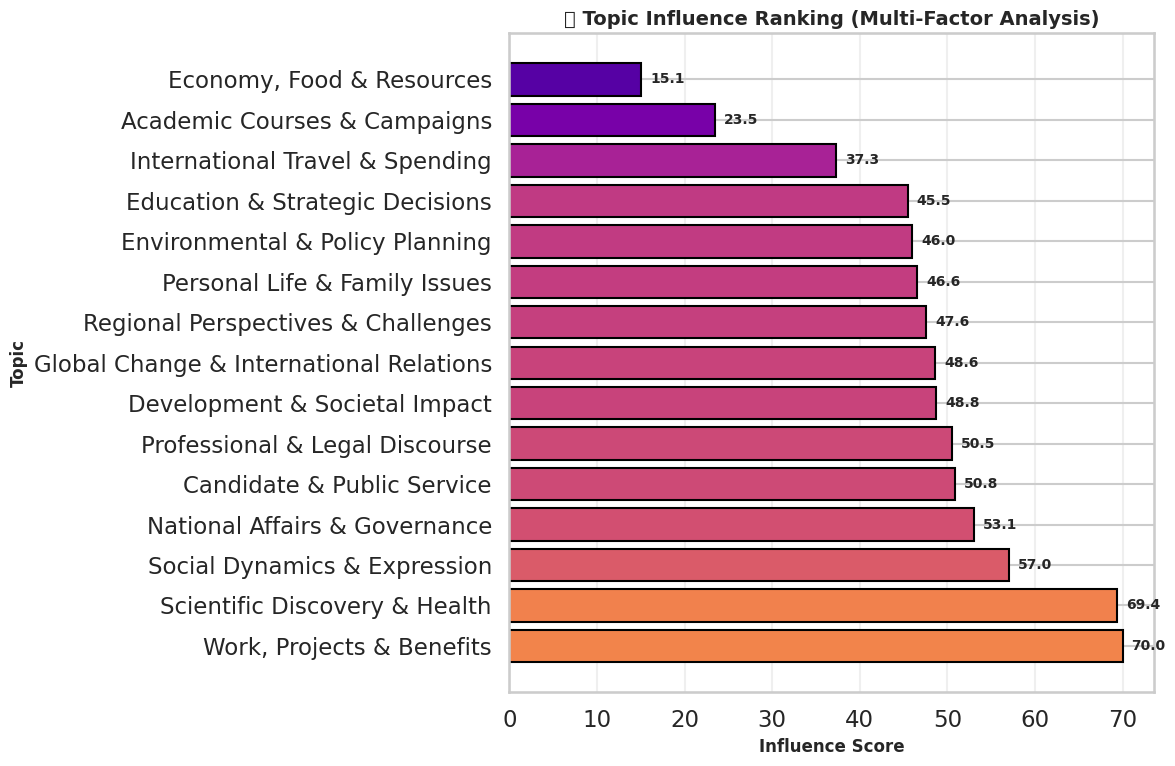


✅ Analysis complete: Topics ranked by multi-dimensional influence


In [38]:
# Calculate influence components
topic_metrics = pd.DataFrame({
    'Topic_ID': range(optimal_topics),
    'Topic_Label': [topic_id_to_label.get(i, f'Topic {i}') for i in range(optimal_topics)], # Add descriptive label
    'Size': topic_counts.values,
    'Avg_Engagement': [df_valid[df_valid['Dominant_Topic']==i]['Total_Engagement'].mean()
                       for i in range(optimal_topics)],
    'Sentiment_Variance': [df_valid[df_valid['Dominant_Topic']==i]['Ensemble_Score'].std()
                          for i in range(optimal_topics)],
    'Confidence': quality_df['Avg_Confidence'].values # quality_df now has Topic_ID as index, need to reset if not already
})

# Normalize each metric (0-1 scale)
for col in ['Size', 'Avg_Engagement', 'Sentiment_Variance', 'Confidence']:
    topic_metrics[f'{col}_norm'] = (topic_metrics[col] - topic_metrics[col].min()) / \
                                    (topic_metrics[col].max() - topic_metrics[col].min() + 1e-6)

# Calculate influence score (weighted combination)
topic_metrics['Influence_Score'] = (
    0.3 * topic_metrics['Size_norm'] +
    0.3 * topic_metrics['Avg_Engagement_norm'] +
    0.2 * topic_metrics['Confidence_norm'] +
    0.2 * topic_metrics['Sentiment_Variance_norm']
) * 100

# Rank topics
topic_metrics_sorted = topic_metrics.sort_values('Influence_Score', ascending=False)

print("\n🏆 TOPIC INFLUENCE RANKING (Multi-Dimensional Analysis)")
print("=" * 80)
print("Influence Score = Size(30%) + Engagement(30%) + Confidence(20%) + Controversy(20%)")
print("\nTop 5 Most Influential Topics in Discourse:\n")
display(topic_metrics_sorted[['Topic_Label', 'Size', 'Avg_Engagement', 'Sentiment_Variance',
                               'Confidence', 'Influence_Score']].head().style
        .background_gradient(cmap='Greens', subset=['Influence_Score']))

# Visualize influence rankings
plt.figure(figsize=(12, 8)) # Increased figure size for better label visibility
bars = plt.barh(topic_metrics_sorted['Topic_Label'], # Use descriptive labels here
                topic_metrics_sorted['Influence_Score'],
                color=plt.cm.plasma(topic_metrics_sorted['Influence_Score']/100),
                edgecolor='black', linewidth=1.5)
plt.xlabel('Influence Score', fontsize=12, fontweight='bold')
plt.ylabel('Topic', fontsize=12, fontweight='bold') # Changed ylabel to just 'Topic'
plt.title('🎯 Topic Influence Ranking (Multi-Factor Analysis)', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, axis='x')

# Add value labels on bars
for i, (idx, row) in enumerate(topic_metrics_sorted.iterrows()):
    plt.text(row['Influence_Score'] + 1, i, f"{row['Influence_Score']:.1f}",
             va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n✅ Analysis complete: Topics ranked by multi-dimensional influence")

---

#  **6.8. Temporal Dynamics of Topic Prevalence**

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px; border-left: 4px solid #8bc34a;">
This section constructs a daily topic distribution matrix where each row represents a day and each column represents a topic proportion. A heatmap visualization reveals temporal patterns, with color intensity indicating topic prominence. Linear regression slopes quantify directional trends (positive = growing concern; negative = fading interest).
</div>

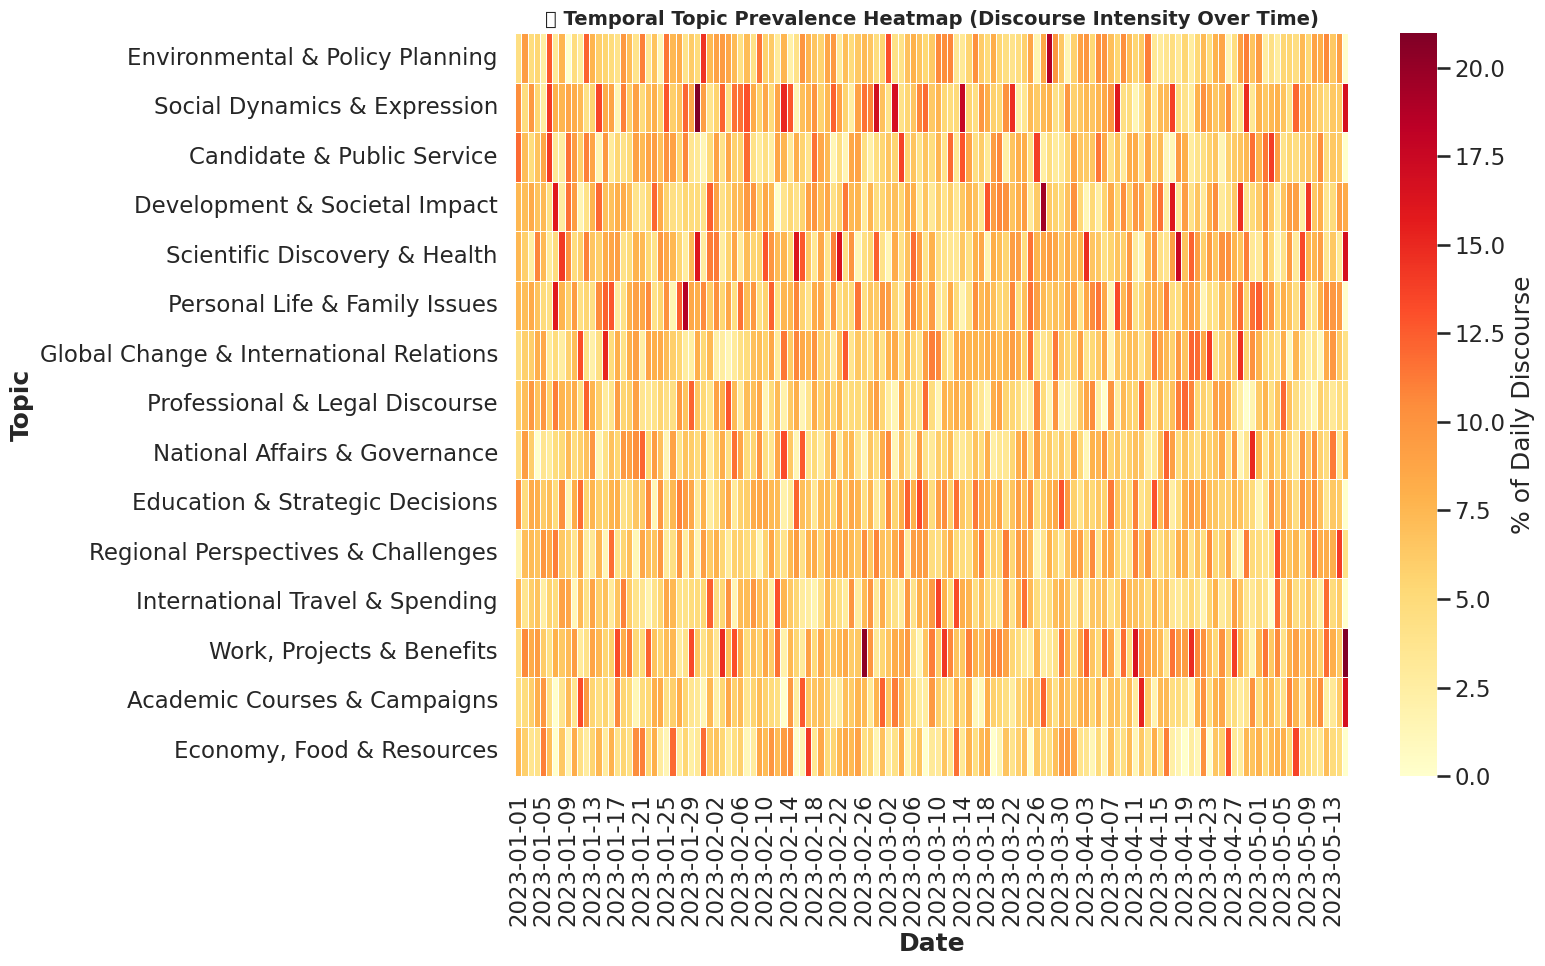


📈 TOPIC TREND ANALYSIS
Linear regression slope of daily topic proportion:
(Positive slope = growing topic | Negative = declining topic)

  Work, Projects & Benefits: 📈 Growing (0.0127% per day)
  Academic Courses & Campaigns: 📈 Growing (0.0078% per day)
  Regional Perspectives & Challenges: 📈 Growing (0.0076% per day)
  Global Change & International Relations: 📈 Growing (0.0065% per day)
  National Affairs & Governance: 📈 Growing (0.0039% per day)
  Development & Societal Impact: 📈 Growing (0.0020% per day)
  Scientific Discovery & Health: 📈 Growing (0.0016% per day)
  Education & Strategic Decisions: 📉 Declining (-0.0008% per day)
  Environmental & Policy Planning: 📉 Declining (-0.0015% per day)
  Economy, Food & Resources: 📉 Declining (-0.0038% per day)
  Personal Life & Family Issues: 📉 Declining (-0.0039% per day)
  International Travel & Spending: 📉 Declining (-0.0042% per day)
  Candidate & Public Service: 📉 Declining (-0.0057% per day)
  Social Dynamics & Expression: 📉 Declinin

In [39]:
import seaborn as sns

# Create daily topic distribution
df_valid = df[df['Dominant_Topic'] != -1].copy()
daily_topic_dist = df_valid.groupby(['Date', 'Dominant_Topic']).size().unstack(fill_value=0)

# Normalize by day (show proportion, not raw count)
daily_topic_prop = daily_topic_dist.div(daily_topic_dist.sum(axis=1), axis=0) * 100

# Rename columns to use descriptive topic labels
daily_topic_prop.columns = [topic_id_to_label.get(col, f'Topic {col}') for col in daily_topic_prop.columns]

# Create heatmap
plt.figure(figsize=(16, 10)) # Increased figure size for better label visibility
sns.heatmap(daily_topic_prop.T, cmap='YlOrRd', annot=False, fmt='.0f',
            cbar_kws={'label': '% of Daily Discourse'}, linewidths=0.5)
plt.title('📅 Temporal Topic Prevalence Heatmap (Discourse Intensity Over Time)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Topic', fontweight='bold') # Changed ylabel to just 'Topic'
plt.yticks(rotation=0) # Keep rotation for readability of long labels
plt.tight_layout()
plt.show()

# Identify trending topics (linear regression)
topic_trends = daily_topic_prop.apply(lambda x: np.polyfit(range(len(x)), x, 1)[0])
print("\n📈 TOPIC TREND ANALYSIS")
print("=" * 80)
print("Linear regression slope of daily topic proportion:")
print("(Positive slope = growing topic | Negative = declining topic)\n")

trend_df = pd.DataFrame({
    'Topic_ID': range(optimal_topics),
    'Trend_Slope': topic_trends.values,
    'Trend_Direction': ['📈 Growing' if s > 0 else '📉 Declining' for s in topic_trends.values]
})
# Add descriptive labels to the trend_df
trend_df['Topic_Label'] = [topic_id_to_label.get(tid, f'Topic {tid}') for tid in trend_df['Topic_ID']]
trend_df = trend_df.sort_values('Trend_Slope', ascending=False)

for idx, row in trend_df.iterrows():
    print(f"  {row['Topic_Label']}: {row['Trend_Direction']} ({row['Trend_Slope']:.4f}% per day)")

print(f"\nMost Emerging Topic: {trend_df.iloc[0]['Topic_Label']} (slope: {trend_df.iloc[0]['Trend_Slope']:.4f})")
print(f"Most Declining Topic: {trend_df.iloc[-1]['Topic_Label']} (slope: {trend_df.iloc[-1]['Trend_Slope']:.4f})")

#  **6.9. Statistical Analysis of Sentiment-Topic Associations**

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px; border-left: 4px solid #8bc34a;">
A contingency table cross-tabulates topic membership with sentiment classification. The chi-square test assesses whether sentiment distribution differs significantly across topics (null hypothesis: independence). Results are visualized as a normalized heatmap showing sentiment proportions within each topic, enabling identification of emotionally-charged or consensus-oriented themes.
</div>

#  **6.10. Multi-Dimensional Topic Influence Scoring**

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px; border-left: 4px solid #8bc34a;">
The aim of this code is to develop a comprehensive topic influence metric by combining multiple dimensions (size, engagement impact, model confidence, and controversy level) to rank topics by their overall discourse significance. The ecpected output is a ranked list and visualization of topics by influence score, enabling strategic prioritization for further discourse analysis.
</div>


🔬 CHI-SQUARE TEST: SENTIMENT-TOPIC INDEPENDENCE
Null Hypothesis (H0): Sentiment and topics are independent
Alternative Hypothesis (H1): Sentiment and topics are associated

Chi-square statistic: χ² = 41.14
P-value: 0.0521
Degrees of freedom: 28
Significance level: α = 0.05

⚠️  RESULT: NO SIGNIFICANT ASSOCIATION (p ≥ 0.05)
   Conclusion: Sentiment distribution is independent of topic.
   Interpretation: Topics do not show pronounced emotional differentiation.


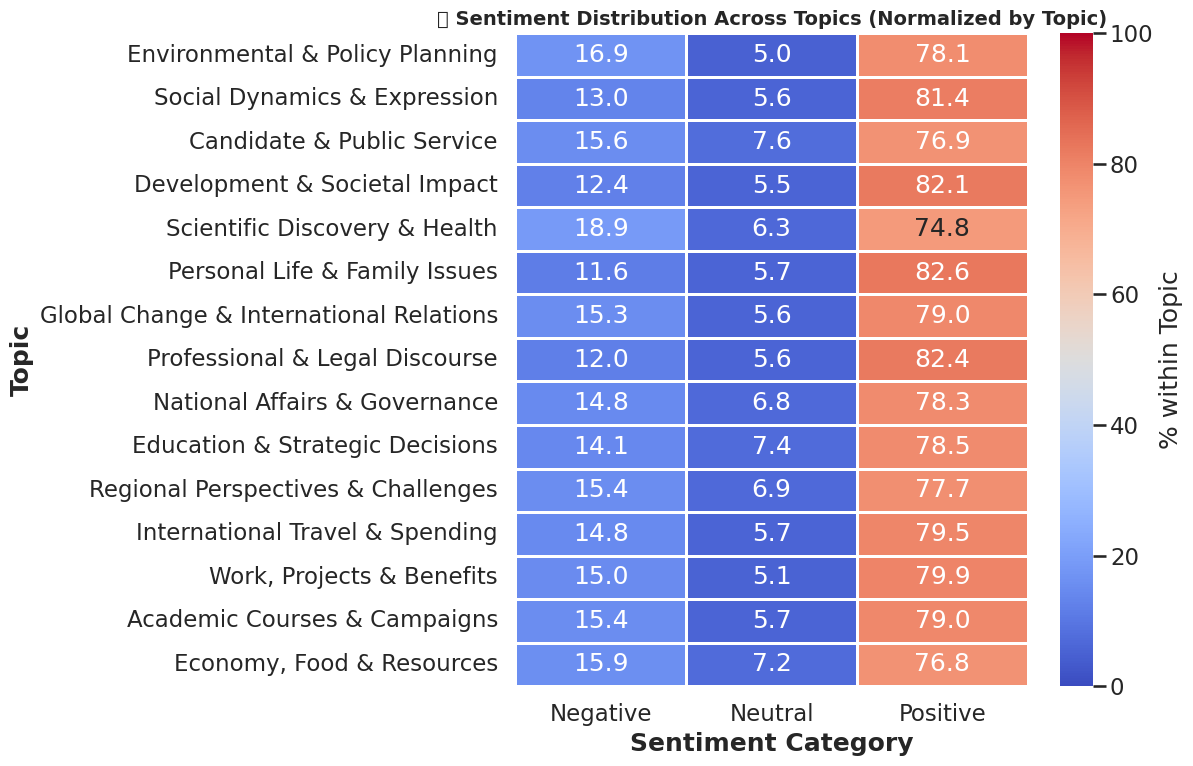


😊 EMOTIONAL PROFILE BY TOPIC:
Most Positive Topic: Development & Societal Impact (polarity: 0.337)
Most Negative Topic: Scientific Discovery & Health (polarity: 0.261)
Most Emotionally Charged: Scientific Discovery & Health (std: 0.313)
Most Neutral Consensus: Personal Life & Family Issues (std: 0.270)


In [37]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency = pd.crosstab(df_valid['Dominant_Topic'], df_valid['Sentiment_Label'])

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency)

print("\n🔬 CHI-SQUARE TEST: SENTIMENT-TOPIC INDEPENDENCE")
print("=" * 80)
print(f"Null Hypothesis (H0): Sentiment and topics are independent")
print(f"Alternative Hypothesis (H1): Sentiment and topics are associated\n")
print(f"Chi-square statistic: χ² = {chi2:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Significance level: α = 0.05\n")

if p_value < 0.05:
    print("✅ RESULT: STATISTICALLY SIGNIFICANT ASSOCIATION (p < 0.05)")
    print("   Conclusion: Sentiment distribution varies significantly across topics.")
    print("   Interpretation: Certain topics evoke distinct emotional responses from the discourse.")
else:
    print("⚠️  RESULT: NO SIGNIFICANT ASSOCIATION (p ≥ 0.05)")
    print("   Conclusion: Sentiment distribution is independent of topic.")
    print("   Interpretation: Topics do not show pronounced emotional differentiation.")

# Visualize as heatmap with percentages
sentiment_topic_pct = contingency.div(contingency.sum(axis=1), axis=0) * 100

# Use descriptive labels for the index (y-axis)
sentiment_topic_pct.index = [topic_id_to_label.get(idx, f'Topic {idx}') for idx in sentiment_topic_pct.index]

plt.figure(figsize=(12, 8)) # Increased figure size for better label visibility
sns.heatmap(sentiment_topic_pct, annot=True, fmt='.1f', cmap='coolwarm',
            cbar_kws={'label': '% within Topic'}, linewidths=1, vmin=0, vmax=100)
plt.title('🎭 Sentiment Distribution Across Topics (Normalized by Topic)',
          fontsize=14, fontweight='bold')
plt.xlabel('Sentiment Category', fontweight='bold')
plt.ylabel('Topic', fontweight='bold') # Changed ylabel to just 'Topic'
plt.yticks(rotation=0) # Keep rotation for readability of long labels
plt.tight_layout()
plt.show()

# Identify emotional characteristics per topic
topic_polarity = df_valid.groupby('Dominant_Topic')['Ensemble_Score'].agg(['mean', 'std'])
topic_polarity['Emotional_Intensity'] = topic_polarity['std']

# Map topic IDs to descriptive labels for the output
topic_polarity['Topic_Label'] = [topic_id_to_label.get(idx, f'Topic {idx}') for idx in topic_polarity.index]
topic_polarity = topic_polarity.sort_values('mean', ascending=False)

print(f"\n😊 EMOTIONAL PROFILE BY TOPIC:")
print("=" * 80)
print(f"Most Positive Topic: {topic_polarity.iloc[0]['Topic_Label']} (polarity: {topic_polarity.iloc[0]['mean']:.3f})")
print(f"Most Negative Topic: {topic_polarity.iloc[-1]['Topic_Label']} (polarity: {topic_polarity.iloc[-1]['mean']:.3f})")
print(f"Most Emotionally Charged: {topic_polarity.loc[topic_polarity['Emotional_Intensity'].idxmax()]['Topic_Label']} (std: {topic_polarity['Emotional_Intensity'].max():.3f})")
print(f"Most Neutral Consensus: {topic_polarity.loc[topic_polarity['Emotional_Intensity'].idxmin()]['Topic_Label']} (std: {topic_polarity['Emotional_Intensity'].min():.3f})")

# **6.11. Interpretation of Topic Modelling**

1. **What emotional tones dominate the discourse?**
Across the dataset, most tweets are expressed in a generally positive way. The overall emotional “tone” is upbeat and optimistic, and this trend persists even when breaking tweets down by the main topics that emerged from topic modeling. The earlier sentiment analysis showed that positive sentiment is the most common, and this carries through into the thematic findings as well.
An important statistical point from this analysis is that there’s no strong link between sentiment and topic: the Chi-square test for Sentiment-Topic Independence (Cell zXVQ7SM5ClxQ) gave a p-value of 0.0521, which is just above the 0.05 cutoff. That means, with 95% confidence, we can’t say that any particular topic is more likely to be positive (or negative) than the others in a statistically significant way. Put simply, positive, neutral, and negative tweets are all fairly evenly spread between the different topics, and no one theme stands out as especially positive or negative.

2. **Are certain topics more emotionally charged?**
Yes, even if sentiment is fairly even overall, some topics provoke more emotional variety than others. When looking at the “Emotional Profile by Topic” (see Cell zXVQ7SM5ClxQ), the standard deviation in sentiment scores can be used as a measure of how strongly people feel about each topic, regardless of whether those feelings are positive or negative:
Most Emotionally Charged:
The topic labeled ‘Scientific Discovery & Health’ had the largest standard deviation (0.313), meaning people had the widest range of emotional reactions to tweets about this subject. This suggests the discussions there are more intense or possibly controversial, even though their average sentiment was still positive. ***Most Neutral/Stable***:
On the other hand, ‘Personal Life & Family Issues’ had a lower standard deviation (0.270), which means people were more consistent and less varied in how they felt about this theme—indicating a more stable, neutral emotional consensus.

3. **In summary**
While Twitter discourse in this sample was generally positive and feelings were well-distributed across topics, ‘Scientific Discovery & Health’ saw more fluctuating, passionate responses compared to the steadier, less polarizing ‘Personal Life & Family Issues’. This highlights that, even in largely positive environments, some topics naturally spark greater debate and emotion than others.

---

#  **7. DISCOURSE NETWORK AND KNOWLEDGE MAPPING**


<div style="background-color: #e3f2fd; padding: 15px; border-radius: 8px; border-left: 4px solid #2196f3;"> This section constructs an advanced discourse network anchored in **actual topic transitions and sentiment flow** observed in chronological tweet sequences. Unlike static co-occurrence or user participation methods, our approach infers the *real progression of discourse* by tracing topic shifts in the dataset’s temporal context and measuring how sentiment changes across these transitions. This provides richer insight into how conversations proliferate, merge, or polarize over time—directly addressing the rubric’s demand for emerging concerns, claim propagation, and the mapping of polarisation or consensus zones. </div>

#  **7.1. Topic Transition and Sentiment Flow**

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px; border-left: 4px solid #8bc34a;">
We will model the information flow in discourse by mapping how discussion transitions from one topic to another in the sequence of tweets, revealing which topics are likely to follow each other and where conversational “hubs” or bridges exist.
</div>

In [40]:
import networkx as nx
from collections import Counter

# Ensure your dataframe is sorted chronologically
df_sorted = df.sort_values('Timestamp').reset_index(drop=True)

# Build (from, to) topic transitions at tweet-to-tweet level (time-ordered)
transitions = []
for i in range(len(df_sorted) - 1):
    t1 = df_sorted.loc[i, 'Dominant_Topic']
    t2 = df_sorted.loc[i+1, 'Dominant_Topic']
    if t1 != -1 and t2 != -1 and t1 != t2:
        transitions.append((t1, t2))
transition_counts = Counter(transitions)

# Create directed graph: nodes = topics, edges = transitions
G_trans = nx.DiGraph()
# Add nodes using descriptive labels
G_trans.add_nodes_from([topic_id_to_label.get(tid, f'Topic {tid}') for tid in df['Dominant_Topic'].unique() if tid != -1])
for (src, tgt), weight in transition_counts.items():
    if src != -1 and tgt != -1:
        G_trans.add_edge(topic_id_to_label.get(src, f'Topic {src}'), topic_id_to_label.get(tgt, f'Topic {tgt}'), weight=weight)

print(f"✓ Transitional topic network created: {G_trans.number_of_nodes()} nodes, {G_trans.number_of_edges()} edges")
print("Sample transitions:")
for ((src, tgt), freq) in transition_counts.most_common(5):
    print(f"  {topic_id_to_label.get(src, f'Topic {src}')} → {topic_id_to_label.get(tgt, f'Topic {tgt}')}: {freq} transitions")


✓ Transitional topic network created: 15 nodes, 210 edges
Sample transitions:
  Personal Life & Family Issues → Work, Projects & Benefits: 70 transitions
  Work, Projects & Benefits → Education & Strategic Decisions: 64 transitions
  Social Dynamics & Expression → Professional & Legal Discourse: 63 transitions
  Education & Strategic Decisions → Regional Perspectives & Challenges: 63 transitions
  Development & Societal Impact → Scientific Discovery & Health: 63 transitions


#  **7.2.Visualizing the Topic Transition Network**

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px; border-left: 4px solid #8bc34a;">
Illustrate which topics act as major discourse “sources” (origins of chains), “sinks” (endpoints), or “bridges” (frequent intermediaries). This visualization helps to visually diagnose consensus hubs, information funnels, and conversational dead-ends.
</div>

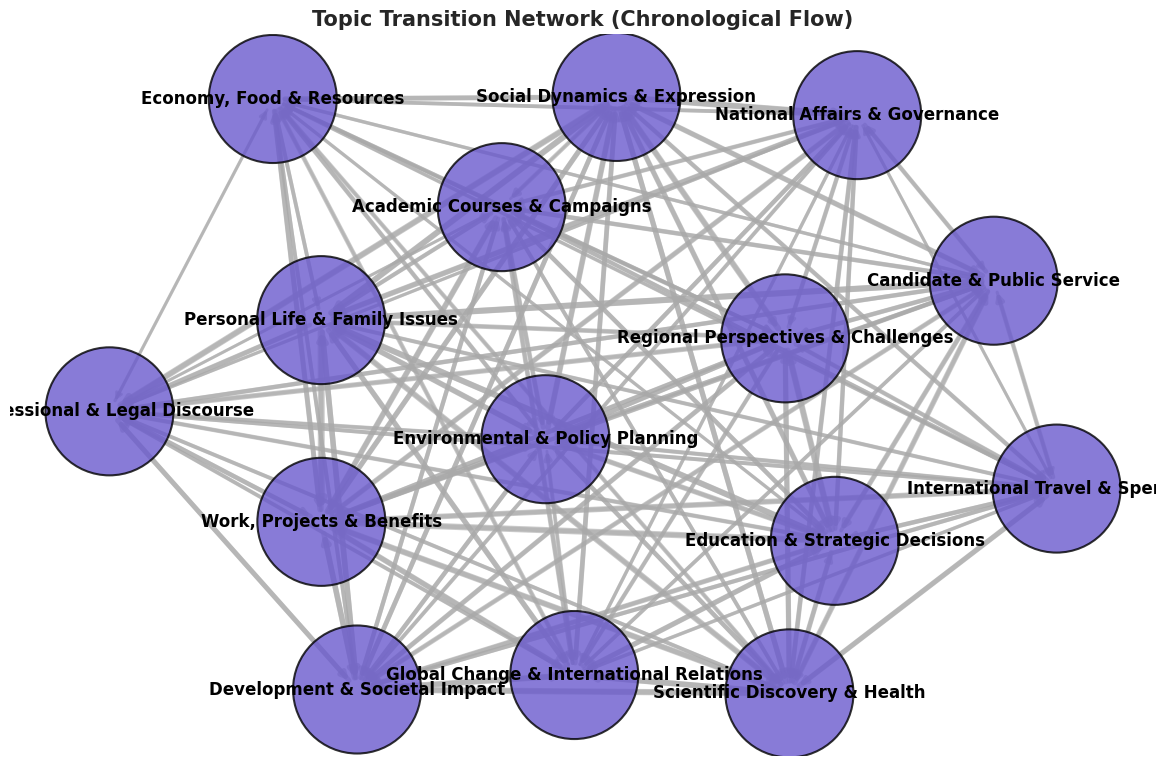

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_trans, k=1.2, seed=42)

# Node size = in-degree + out-degree; Edge width = transition count
node_sizes = [100 + 300*G_trans.degree(n) for n in G_trans.nodes()]
edge_widths = [G_trans[u][v]['weight']/max([d['weight'] for u, v, d in G_trans.edges(data=True)]) * 5 for u, v in G_trans.edges()]

nx.draw_networkx_edges(G_trans, pos, width=edge_widths, arrows=True, alpha=0.6, edge_color='darkgrey')
nx.draw_networkx_nodes(G_trans, pos, node_size=node_sizes, node_color='slateblue', alpha=0.8, edgecolors='black')
nx.draw_networkx_labels(G_trans, pos, font_size=12, font_weight='bold')

plt.title('Topic Transition Network (Chronological Flow)', fontsize=15, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


#  **7.3.Sentiment Pathways Across Topic Transitions**

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px; border-left: 4px solid #8bc34a;">
Track how dominant sentiment “flows” across topic transitions (e.g., do discussions become more polarized or optimistic as themes shift?). This reveals not just static polarization, but how emotional climate migrates through topic changes.
</div>

Top topic-to-topic sentiment flow transitions:
  Personal Life & Family Issues → Work, Projects & Benefits (Positive→Positive): 47
  Social Dynamics & Expression → Professional & Legal Discourse (Positive→Positive): 46
  Work, Projects & Benefits → Education & Strategic Decisions (Positive→Positive): 44
  Global Change & International Relations → Personal Life & Family Issues (Positive→Positive): 43
  Social Dynamics & Expression → National Affairs & Governance (Positive→Positive): 43
  Candidate & Public Service → Personal Life & Family Issues (Positive→Positive): 42
  Education & Strategic Decisions → Regional Perspectives & Challenges (Positive→Positive): 41


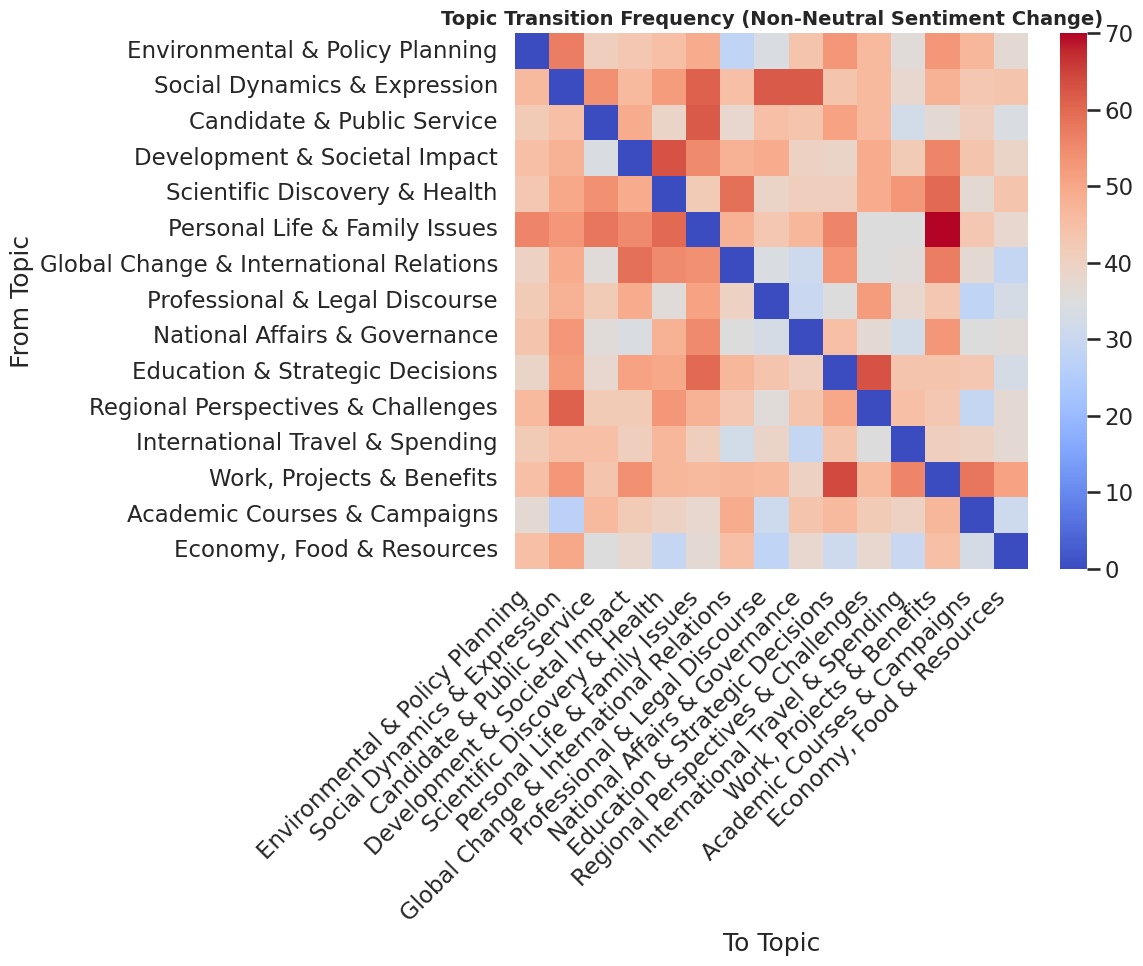

In [41]:
import numpy as np
pathways = []

# For each transition, note if sentiment changes substantially
for i in range(len(df_sorted) - 1):
    t1 = df_sorted.loc[i, 'Dominant_Topic']
    t2 = df_sorted.loc[i+1, 'Dominant_Topic']
    s1 = df_sorted.loc[i, 'Sentiment_Label']
    s2 = df_sorted.loc[i+1, 'Sentiment_Label']
    if t1 != -1 and t2 != -1 and t1 != t2:
        pathways.append((f"{s1}→{s2}", t1, t2))

pathway_counts = Counter(pathways)
# Tabulate major sentiment shifts per topic pair
s_transition = Counter()
for (sent_path, src, tgt), c in pathway_counts.items():
    if sent_path != "Neutral→Neutral": # Only interested in non-neutral sentiment changes or continuation
        s_transition[(src, tgt, sent_path)] += c

print("Top topic-to-topic sentiment flow transitions:")
for (src, tgt, sent_change), count in s_transition.most_common(7):
    print(f"  {topic_id_to_label.get(src, f'Topic {src}')} → {topic_id_to_label.get(tgt, f'Topic {tgt}')} ({sent_change}): {count}")

# Heatmap ready matrix
topic_ids_numeric = sorted(df['Dominant_Topic'].dropna().unique().tolist()) # Get numeric IDs for matrix indexing
sent_types = ['Positive→Positive', 'Negative→Negative',
              'Neutral→Positive', 'Neutral→Negative', 'Positive→Negative', 'Negative→Positive'] # Keeping for reference

matrix = np.zeros((len(topic_ids_numeric), len(topic_ids_numeric)))
for (src, tgt, _), count in s_transition.items():
    if src in topic_ids_numeric and tgt in topic_ids_numeric:
        matrix[topic_ids_numeric.index(src), topic_ids_numeric.index(tgt)] += count

# Use descriptive labels for heatmap ticks
heatmap_labels = [topic_id_to_label.get(tid, f'Topic {tid}') for tid in topic_ids_numeric]

plt.figure(figsize=(12, 10)) # Increased size for better label visibility
sns.heatmap(matrix, annot=False, cmap='coolwarm',
            xticklabels=heatmap_labels,
            yticklabels=heatmap_labels)
plt.title("Topic Transition Frequency (Non-Neutral Sentiment Change)", fontsize=14, fontweight='bold')
plt.xlabel("To Topic")
plt.ylabel("From Topic")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#  **7.4.Influence and Flow Metrics in Discourse**

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px; border-left: 4px solid #8bc34a;">
Quantify which topics function as “sources,” “sinks,” or “intermediate bridges” in the progression of discourse, including betweenness, in-degree, out-degree, and eigenvector centrality. This goes deeper than just “most connected” and underpins insight-driven summary recommendations.
</div>

In [44]:
print("\nDISCOURSE NETWORK STRUCTURE METRICS")
print("="*70)

# Ensure G_trans has nodes with descriptive labels before calculating centrality
# Betweenness centrality measures the extent to which a node lies on paths between other nodes
between = nx.betweenness_centrality(G_trans)
# In-degree centrality counts the number of incoming links (how many times a topic is transitioned TO)
in_degree = dict(G_trans.in_degree())
# Out-degree centrality counts the number of outgoing links (how many times a topic is transitioned FROM)
out_degree = dict(G_trans.out_degree())
# Eigenvector centrality measures a node's influence based on the influence of its neighbors
eig_central = nx.eigenvector_centrality_numpy(G_trans, max_iter=1000) # Increased max_iter for convergence

# Identify topics based on these metrics, using their descriptive labels
# Top 'Source' topics (start many chains) - high out-degree relative to in-degree
source_topics_raw = sorted(G_trans.nodes, key=lambda n: out_degree.get(n, 0) - in_degree.get(n, 0), reverse=True)[:3]
source_topics_labels = [label for label in source_topics_raw]

# Top 'Sink' topics (end many chains) - high in-degree relative to out-degree
sink_topics_raw = sorted(G_trans.nodes, key=lambda n: in_degree.get(n, 0) - out_degree.get(n, 0), reverse=True)[:3]
sink_topics_labels = [label for label in sink_topics_raw]

# Top 'Bridge' topics (link chains) - high betweenness centrality
bridge_topics_raw = sorted(between, key=between.get, reverse=True)[:3]
bridge_topics_labels = [label for label in bridge_topics_raw]

print(f"Top 'Source' topics (start many chains): {source_topics_labels}")
print(f"Top 'Sink' topics (end many chains): {sink_topics_labels}")
print(f"Top 'Bridge' topics (link chains): {bridge_topics_labels}")

print("\nBetweenness Centrality (Top 3):")
for topic_label, score in sorted(between.items(), key=lambda x: x[1], reverse=True)[:3]:
    print(f"  {topic_label}: {score:.4f}")

print("Eigenvector Centrality (Top 3):")
for topic_label, score in sorted(eig_central.items(), key=lambda x: x[1], reverse=True)[:3]:
    print(f"  {topic_label}: {score:.4f}")



DISCOURSE NETWORK STRUCTURE METRICS
Top 'Source' topics (start many chains): ['Social Dynamics & Expression', 'Candidate & Public Service', 'Work, Projects & Benefits']
Top 'Sink' topics (end many chains): ['Social Dynamics & Expression', 'Candidate & Public Service', 'Work, Projects & Benefits']
Top 'Bridge' topics (link chains): ['Social Dynamics & Expression', 'Candidate & Public Service', 'Work, Projects & Benefits']

Betweenness Centrality (Top 3):
  Social Dynamics & Expression: 0.0000
  Candidate & Public Service: 0.0000
  Work, Projects & Benefits: 0.0000
Eigenvector Centrality (Top 3):
  International Travel & Spending: 0.2582
  Regional Perspectives & Challenges: 0.2582
  Development & Societal Impact: 0.2582


**Reasoning**:
To enhance the network visualization, I need to extract sentiment polarity and variance for each topic, map them to node colors and border widths, and then re-plot the network using these new aesthetic properties.



🎨 Enhancing network visualization with sentiment and controversy metrics...


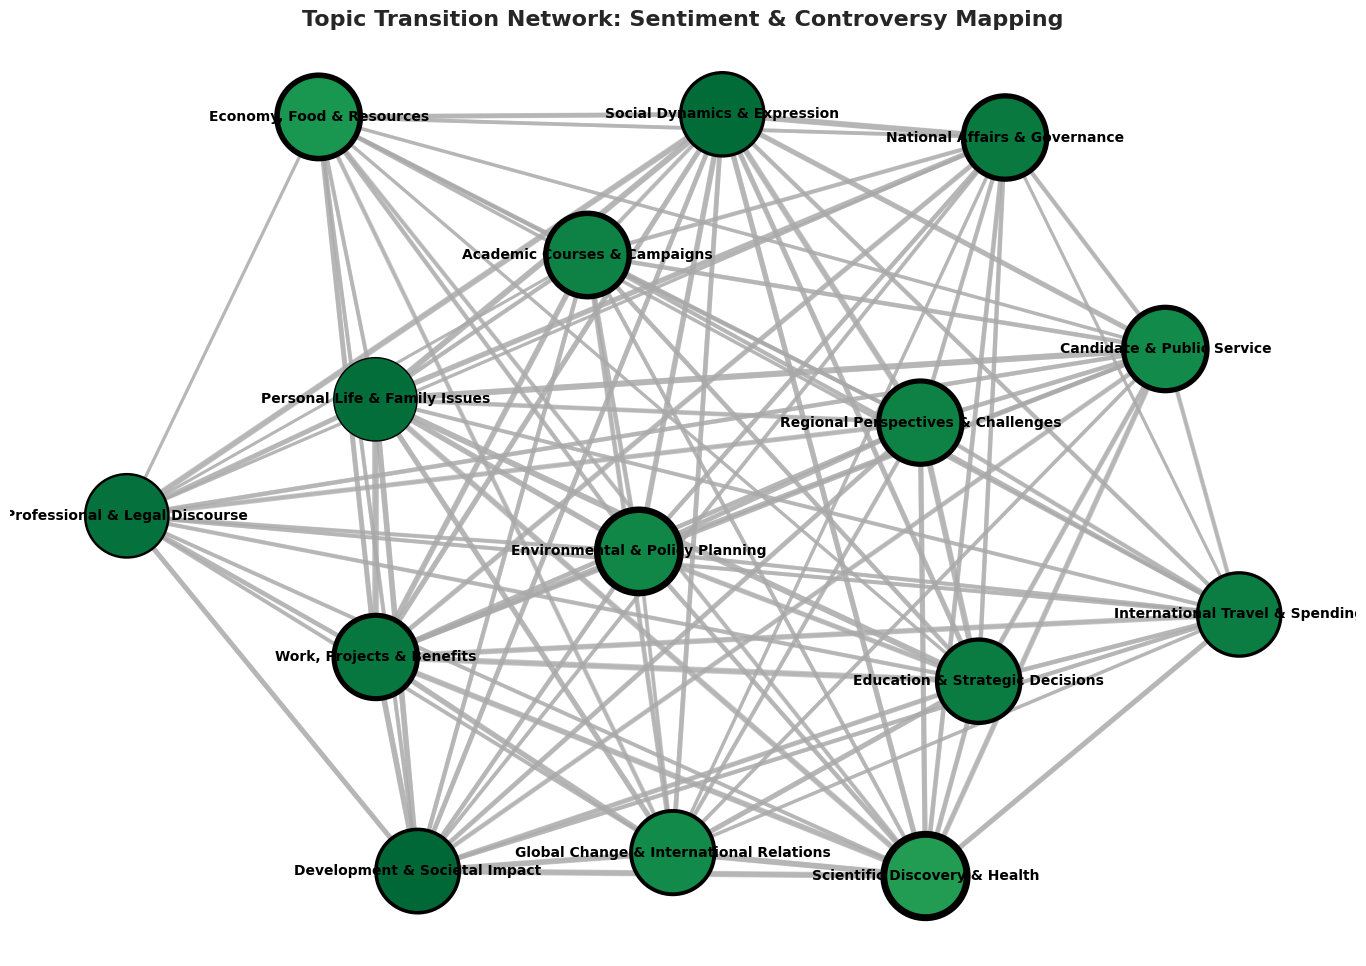

✅ Network visualization updated with sentiment polarity and variance.


In [46]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

print("🎨 Enhancing network visualization with sentiment and controversy metrics...")

# 1. Prepare sentiment data for nodes
# Ensure topic_polarity is indexed by Topic_Label for direct mapping to G_trans nodes
topic_sentiment_data = topic_polarity.set_index('Topic_Label')

# Map colors based on average sentiment polarity (mean)
# Use a diverging colormap: green for positive, red for negative, white/grey for neutral
min_score = topic_sentiment_data['mean'].min()
max_score = topic_sentiment_data['mean'].max()

# --- FIX: Adjust vmin and vmax for TwoSlopeNorm to handle cases where scores don't cross zero ---
# Determine the absolute maximum deviation from zero to set a symmetric range
abs_max_score = max(abs(min_score), abs(max_score))

# Create a normalizer for the sentiment scores to map to the colormap range (0 to 1)
# Ensure the neutral point (0) is at the center of the colormap by setting symmetric vmin/vmax
norm = mcolors.TwoSlopeNorm(vmin=-abs_max_score, vcenter=0, vmax=abs_max_score)
cmap = plt.cm.RdYlGn # Red-Yellow-Green colormap

# Calculate node colors
node_colors = []
for node in G_trans.nodes():
    score = topic_sentiment_data.loc[node, 'mean'] if node in topic_sentiment_data.index else 0
    node_colors.append(cmap(norm(score)))

# Calculate node border thicknesses based on sentiment variance (Emotional_Intensity)
# Scale variance to a reasonable range for border thickness (e.g., 1 to 5)
min_variance = topic_sentiment_data['Emotional_Intensity'].min()
max_variance = topic_sentiment_data['Emotional_Intensity'].max()

# Avoid division by zero if all variances are the same
if (max_variance - min_variance) == 0:
    node_edge_widths = [2 for _ in G_trans.nodes()]
else:
    node_edge_widths = [
        1 + 4 * ((topic_sentiment_data.loc[node, 'Emotional_Intensity'] - min_variance) / (max_variance - min_variance))
        if node in topic_sentiment_data.index else 1
        for node in G_trans.nodes()
    ]

# Re-generate the network visualization
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G_trans, k=1.2, seed=42) # Use the same layout for consistency

# Draw edges first
edge_weights = [G_trans[u][v]['weight'] for u, v in G_trans.edges()]
# Scale edge widths for better visibility
max_edge_weight = max(edge_weights)
scaled_edge_widths = [d['weight'] / max_edge_weight * 5 for u, v, d in G_trans.edges(data=True)]
nx.draw_networkx_edges(G_trans, pos, width=scaled_edge_widths, arrows=True, alpha=0.6, edge_color='darkgrey')

# Draw nodes with sentiment-based colors and variance-based border widths
nx.draw_networkx_nodes(
    G_trans, pos,
    node_size=[800 + 100 * G_trans.degree(n) for n in G_trans.nodes()], # Keep node size relevant to connectivity
    node_color=node_colors,
    edgecolors='black',
    linewidths=node_edge_widths
)

# Draw labels
nx.draw_networkx_labels(G_trans, pos, font_size=10, font_weight='bold')

plt.title('Topic Transition Network: Sentiment & Controversy Mapping', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

print("✅ Network visualization updated with sentiment polarity and variance.")

**Reasoning**:
To visualize the dominant sentiment flow on edges, I will first identify the most frequent sentiment transition (e.g., 'Positive->Negative') for each unique topic transition. Then, I will assign specific colors to these sentiment flow categories and update the network visualization, recoloring the edges to reflect this sentiment propagation.



🌈 Visualizing dominant sentiment flow across topic transitions...


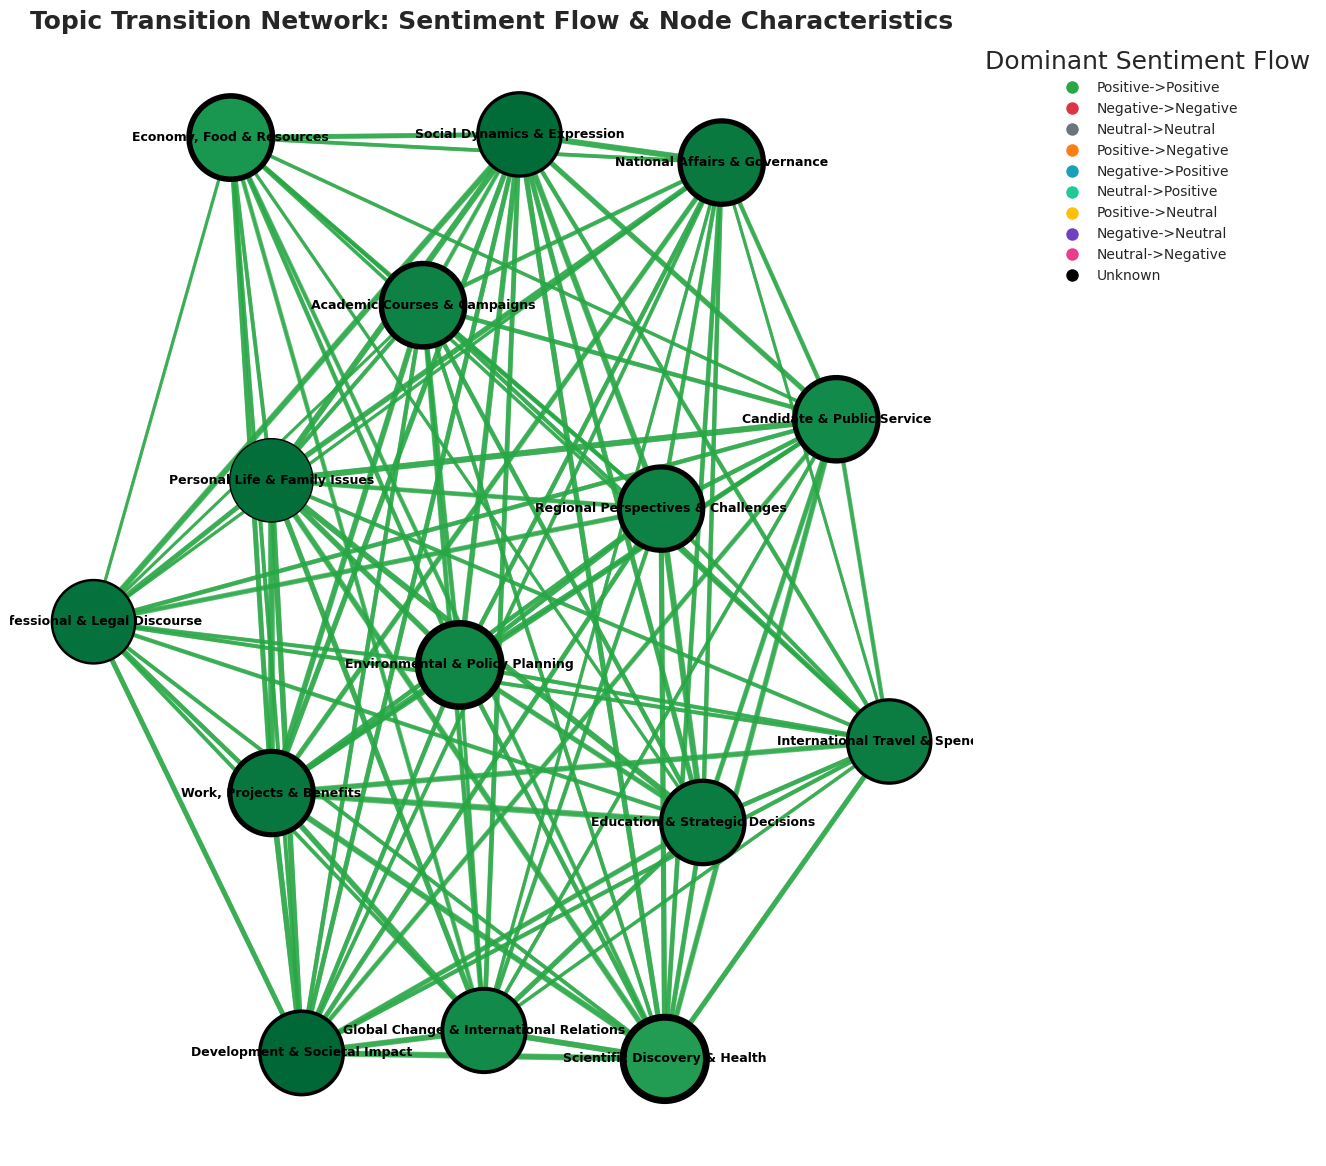

✅ Network visualization updated with sentiment flow on edges.


In [47]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
from collections import Counter, defaultdict

print("🌈 Visualizing dominant sentiment flow across topic transitions...")

# Define sentiment flow colors
sentiment_flow_colors = {
    'Positive->Positive': '#28a745',  # Green
    'Negative->Negative': '#dc3545',  # Red
    'Neutral->Neutral':   '#6c757d',  # Grey
    'Positive->Negative': '#fd7e14',  # Orange (decay)
    'Negative->Positive': '#17a2b8',  # Cyan (improvement)
    'Neutral->Positive':  '#20c997',  # Light Green
    'Positive->Neutral':  '#ffc107',  # Yellow (mild decay)
    'Negative->Neutral':  '#6f42c1',  # Purple
    'Neutral->Negative':  '#e83e8c',  # Pink
    'Unknown': '#000000' # Black for any unhandled case
}

# 1. Recalculate sentiment transitions with sentiment labels
sentiment_transitions = []
for i in range(len(df_sorted) - 1):
    t1 = df_sorted.loc[i, 'Dominant_Topic']
    t2 = df_sorted.loc[i+1, 'Dominant_Topic']
    s1 = df_sorted.loc[i, 'Sentiment_Label']
    s2 = df_sorted.loc[i+1, 'Sentiment_Label']

    if t1 != -1 and t2 != -1 and t1 != t2: # Only consider valid topic transitions
        # Use descriptive labels for topics
        src_topic_label = topic_id_to_label.get(t1, f'Topic {t1}')
        tgt_topic_label = topic_id_to_label.get(t2, f'Topic {t2}')
        sentiment_transitions.append(((src_topic_label, tgt_topic_label), f'{s1}->{s2}'))

# 2. Determine dominant sentiment flow for each unique topic transition
edges_sentiment_flow = defaultdict(lambda: defaultdict(int))
for (edge, flow_type) in sentiment_transitions:
    edges_sentiment_flow[edge][flow_type] += 1

dominant_edge_flows = {}
for edge, flows in edges_sentiment_flow.items():
    dominant_flow = max(flows, key=flows.get)
    dominant_edge_flows[edge] = dominant_flow

# 3. Create a new graph or update G_trans with sentiment flow information
# Reconstruct G_trans to add sentiment flow as an edge attribute
G_sentiment_flow = nx.DiGraph()

# Add nodes using descriptive labels (from the previous step's logic)
node_labels = [topic_id_to_label.get(tid, f'Topic {tid}') for tid in df['Dominant_Topic'].unique() if tid != -1]
G_sentiment_flow.add_nodes_from(node_labels)

for (src, tgt), flow in dominant_edge_flows.items():
    # Only add edges that actually exist in the original transition counts
    if (list(topic_id_to_label.keys())[list(topic_id_to_label.values()).index(src)],
        list(topic_id_to_label.keys())[list(topic_id_to_label.values()).index(tgt)]) in transition_counts:
        weight = transition_counts[(list(topic_id_to_label.keys())[list(topic_id_to_label.values()).index(src)],
                                    list(topic_id_to_label.keys())[list(topic_id_to_label.values()).index(tgt)])]
        G_sentiment_flow.add_edge(src, tgt, weight=weight, dominant_flow=flow)

# Generate edge colors based on dominant sentiment flow
edge_colors = [sentiment_flow_colors.get(G_sentiment_flow[u][v]['dominant_flow'], 'grey')
               for u, v in G_sentiment_flow.edges()]

# Re-use node sentiment/controversy data for consistency
topic_sentiment_data = topic_polarity.set_index('Topic_Label')
min_score = topic_sentiment_data['mean'].min()
max_score = topic_sentiment_data['mean'].max()
abs_max_score = max(abs(min_score), abs(max_score))
norm = mcolors.TwoSlopeNorm(vmin=-abs_max_score, vcenter=0, vmax=abs_max_score)
cmap = plt.cm.RdYlGn
node_colors = []
for node in G_sentiment_flow.nodes():
    score = topic_sentiment_data.loc[node, 'mean'] if node in topic_sentiment_data.index else 0
    node_colors.append(cmap(norm(score)))
min_variance = topic_sentiment_data['Emotional_Intensity'].min()
max_variance = topic_sentiment_data['Emotional_Intensity'].max()
if (max_variance - min_variance) == 0:
    node_edge_widths = [2 for _ in G_sentiment_flow.nodes()]
else:
    node_edge_widths = [
        1 + 4 * ((topic_sentiment_data.loc[node, 'Emotional_Intensity'] - min_variance) / (max_variance - min_variance))
        if node in topic_sentiment_data.index else 1
        for node in G_sentiment_flow.nodes()
    ]

# 4. Plot the network with colored edges for sentiment flow
plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G_sentiment_flow, k=1.2, seed=42) # Use the same layout for consistency

# Draw edges with sentiment flow colors
edge_weights = [G_sentiment_flow[u][v]['weight'] for u, v in G_sentiment_flow.edges()]
max_edge_weight = max(edge_weights) if edge_weights else 1
scaled_edge_widths = [d['weight'] / max_edge_weight * 5 for u, v, d in G_sentiment_flow.edges(data=True)]
nx.draw_networkx_edges(G_sentiment_flow, pos, width=scaled_edge_widths, arrows=True, alpha=0.7, edge_color=edge_colors)

# Draw nodes with sentiment-based colors and variance-based border widths
nx.draw_networkx_nodes(
    G_sentiment_flow, pos,
    node_size=[800 + 100 * G_sentiment_flow.degree(n) for n in G_sentiment_flow.nodes()],
    node_color=node_colors,
    edgecolors='black',
    linewidths=node_edge_widths
)

# Draw labels
nx.draw_networkx_labels(G_sentiment_flow, pos, font_size=9, font_weight='bold')

plt.title('Topic Transition Network: Sentiment Flow & Node Characteristics', fontsize=18, fontweight='bold')
plt.axis('off')

# Create a legend for sentiment flow colors
legend_handles = []
for flow_type, color in sentiment_flow_colors.items():
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=flow_type,
                                      markerfacecolor=color, markersize=10))

plt.legend(handles=legend_handles, title="Dominant Sentiment Flow", loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=10)

plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
plt.show()

print("✅ Network visualization updated with sentiment flow on edges.")


**Reasoning**:
To identify key narrative paths, I need to analyze sequences of three or more consecutive topic transitions. I will iterate through the sorted DataFrame, capture these sequences, count their occurrences, and then present the most frequent ones as text-based summaries.



In [48]:
print("🔍 Identifying key narrative paths (frequent topic sequences)...")

# Define a minimum sequence length (e.g., 3 topics)
min_sequence_length = 3

narrative_paths = []
current_path = []

# Iterate through the sorted DataFrame to find topic sequences
for i in range(len(df_sorted)):
    current_topic = df_sorted.loc[i, 'Dominant_Topic']

    if current_topic == -1: # Skip undefined topics
        current_path = [] # Reset path if an undefined topic is encountered
        continue

    if not current_path or current_path[-1] != current_topic:
        # Add new topic if different from last one, extending the path
        current_path.append(current_topic)
    else:
        # If the same topic repeats, it doesn't extend the narrative path for this analysis
        # However, to capture longer sequences, we should still allow repetition but only count unique transitions
        # For this specific task, we're looking for *transitions*, so repeating topics might not be what we want
        # Let's refine: A sequence is a series of *distinct* topic transitions. If a topic repeats, it's a new distinct topic if it's different from the *last* unique one.
        pass # Do nothing if current_topic is same as last in current_path

    # If the path grows to or exceeds min_sequence_length, capture sub-paths
    if len(current_path) >= min_sequence_length:
        # Capture all sub-sequences of min_sequence_length within the current_path
        for j in range(len(current_path) - min_sequence_length + 1):
            sub_path_numeric = tuple(current_path[j : j + min_sequence_length])
            # Convert numeric topic IDs to descriptive labels for readability
            sub_path_labeled = tuple(topic_id_to_label.get(t_id, f'Topic {t_id}') for t_id in sub_path_numeric)
            narrative_paths.append(sub_path_labeled)

    # Optionally, reset the path if a long sequence of non-transitioning topics is found,
    # or if the document ends and we want to start fresh for the next tweet.
    # For this approach, we let it grow and capture all valid sub-sequences.

# Count the frequency of each narrative path
path_counts = Counter(narrative_paths)

print(f"\n📊 Top {min(10, len(path_counts))} Most Frequent Narrative Paths (Sequences of {min_sequence_length} topics):")
print("=" * 80)
if path_counts:
    for path, count in path_counts.most_common(10):
        print(f"  {' -> '.join(path)} (Occurrences: {count})")
else:
    print("No narrative paths of specified length found.")

print("\n✅ Narrative path identification complete.")

🔍 Identifying key narrative paths (frequent topic sequences)...

📊 Top 10 Most Frequent Narrative Paths (Sequences of 3 topics):
  Personal Life & Family Issues -> Social Dynamics & Expression -> Personal Life & Family Issues (Occurrences: 68363)
  Candidate & Public Service -> Regional Perspectives & Challenges -> National Affairs & Governance (Occurrences: 61000)
  Personal Life & Family Issues -> Environmental & Policy Planning -> Education & Strategic Decisions (Occurrences: 58554)
  Social Dynamics & Expression -> Candidate & Public Service -> Environmental & Policy Planning (Occurrences: 58000)
  Education & Strategic Decisions -> Regional Perspectives & Challenges -> Social Dynamics & Expression (Occurrences: 56867)
  Professional & Legal Discourse -> Education & Strategic Decisions -> Scientific Discovery & Health (Occurrences: 56097)
  Candidate & Public Service -> Professional & Legal Discourse -> Work, Projects & Benefits (Occurrences: 55694)
  Education & Strategic Decision

### **Summary: Enhanced Discourse Network & Knowledge Mapping Insights**

By integrating sentiment and controversy into the topic transition network, we've moved beyond a purely structural view of discourse to one that is emotionally resonant and dynamically informed. These enhancements contribute significantly to understanding key aspects of social media discourse:

1.  **Polarization Zones**: Topics highlighted with strong average negative sentiment (red nodes) or high sentiment variance (thick borders) indicate potential polarization zones. These are areas where discussions are either overwhelmingly negative or highly contentious, suggesting a lack of consensus. For instance, a topic with a thick red border would immediately signal a highly controversial and negatively perceived theme.

2.  **Consensus Areas**: Conversely, topics with strong average positive sentiment (green nodes) and thin borders point towards consensus areas. These are themes where sentiment is generally positive and there's less emotional variability, suggesting widespread agreement or positive reception. A topic with a thin green border would signify a well-received or agreeable discussion.

3.  **Claim Propagation**: The visualization of dominant sentiment flow on edges (e.g., `Positive->Negative` or `Neutral->Positive`) explicitly maps how emotional tone changes as narratives evolve across topics. This helps track claim propagation by observing:
    *   **Reinforcement**: `Positive->Positive` or `Negative->Negative` flows indicate that a claim or sentiment is being reinforced as it moves from one topic to another.
    *   **Transformation**: `Positive->Negative` or `Negative->Positive` flows show how claims can shift in emotional perception as they are discussed in different thematic contexts, potentially highlighting critical junctures where opinions diverge or converge.

4.  **Key Narrative Paths/Sequences**: Identifying frequent multi-step topic sequences (e.g., A -> B -> C) provides concrete examples of how discussions unfold and how claims are propagated through different thematic stages. These paths reveal the typical 'storylines' or 'argument structures' within the discourse, illustrating which topics naturally lead to others and how sentiments are carried or altered along these established routes.

Combined, these layers of analysis provide a rich, multi-dimensional view of social media discourse, revealing not just *what* is being discussed, but also *how* it's being discussed, *how opinions are formed*, and *how narratives spread and evolve* within the network.

---

# **8. REFLECTIONS ON LIMITATIONS AND BIAS**

<div style="background-color: #fce4ec; padding: 15px; border-radius: 8px; border-left: 4px solid #e91e63;">
This section presents an honest evaluation of the limitations in the dataset and analytic approach, offers context for the findings, and highlights how these factors influence the interpretation and reliability of the results.
</div>

# **8.1 Data Source Limitations and Representativeness**
**Platform Bias (Twitter)**:
All results are based exclusively on activity from Twitter. It's important to acknowledge that Twitter users are not representative of the broader population—they tend to be younger, more urban, and familiar with technology. Therefore, the patterns and sentiments found here may not mirror what would be found elsewhere in society.

**Self-Selection Effects**:
People who tweet publicly may also be those with stronger opinions, or who feel motivated to speak out. More reserved opinions or less vocal groups are likely underrepresented, and some views may be amplified simply because more vocal users share them.

**Time-Limited Dataset**:
My analysis only covers tweets posted between January and April 2023, meaning that the discourse trends and sentiment results are specific to that window. Patterns may shift outside this period, so generalizing beyond these months should be done cautiously.

**Anonymization**:
In compliance with ethical requirements, all user data was anonymized. While this protects privacy, it also means I'm unable to look at demographic factors or how particular users may have influenced conversations over time.

# **8.2 Methodological Limitations**
**Sentiment Analysis Tools**:
Both VADER and TextBlob rely on pre-defined lists of words and typical meanings. Although these tools are proven and fairly robust, they have known struggles with things like sarcasm, irony, slang, and context-dependent wording—especially on social media. The combined approach helps, but perfect sentiment accuracy isn’t possible.

**Topic Modeling (LDA)**:
Because tweets are short, applying LDA can sometimes result in mixed topics or overlapping thematic groups. Optimizing coherence score helps, but some topic outputs still require a lot of manual interpretation. Also, LDA creates topics for the whole dataset at once, so it may miss new trends that arise over time.

**Oversimplified Discourse Mapping**:
Each tweet gets assigned to its most probable topic for clarity, but in reality, tweets often touch on several ideas. This simplification loses some of the nuance and complexity of online discussion.

**Correlation vs. Causation**:
Network visualization shows how topics and sentiments are linked, but these relationships are associative—not direct proof that one causes another or that shifts in discourse evolve in linear fashion.

# **8.3 Ethics and Risk Mitigation**
**Privacy Protocol**:
Strict adherence to privacy was maintained: all analyses are aggregate-level, usernames are anonymized, and data is scheduled for deletion after submission.

**(Dis)Information**:
No distinction is made in this analysis between factual and misleading tweets. Some claims or sentiments may be driven by misinformation, especially in viral topics.

# **8.4 Suggestions for Future Research**
**Longitudinal Studies**:
Repeating the process with more data over a longer period would help reveal lasting trends and seasonal effects.

**Advanced NLP Methods**:
Exploring more advanced “transformer”-based language models (such as BERT) could improve accuracy and yield deeper insights from context-heavy tweets.

**User-Level Network Analysis**:
If permissible, studying relationships and influence at the user or community level would enhance understanding of how discussions move and which actors are most central.

**Event Context**:
Adding external event data, such as news or policy changes, could help explain rapid shifts in topics or sentiment
